In [1]:
# Basic utilities
import os
import csv
import pandas as pd
import numpy as np


# Transformers
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Binarizer
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_selection import SelectKBest
from sklearn.base import BaseEstimator, TransformerMixin


# Models
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression, SGDClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier

#methods
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline

#tools
from sklearn.utils.multiclass import type_of_target
from sklearn.base import BaseEstimator
from sklearn.exceptions import NotFittedError
from sklearn.base import clone
from sklearn.utils.multiclass import unique_labels, type_of_target
from sklearn.utils.validation import check_is_fitted
from sklearn.utils import indexable
from sklearn.utils import _safe_indexing as safe_indexing 
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics._classification import _check_targets
from sklearn.metrics._classification import _check_targets
from sklearn.utils import check_X_y
from sklearn.base import is_regressor as sk_is_regressor
from sklearn.base import is_classifier as sk_is_classifier
from sklearn.base import is_outlier_detector as sk_is_outlier_detector
from yellowbrick.classifier import confusion_matrix



In [2]:
df = pd.read_csv('FEVS5yearT2.csv',sep=',',  low_memory=False)
df.head()

,Unnamed: 0.1,Unnamed: 0,agency_id,Q103,Q104,Q106,Q107,Q113,Q118,Q119,...,Q226_A,Q226_B,Q227_A,Q227_B,Q227_C,Q228_A,Q228_B,Q235_A,Q235_B,Q235_C
0,0,0,TR,2.0,4.0,4.0,4.000000,2.0,5.0,5.0,...,1,0,0,0,0,0,1,0,0,0
1,1,1,AF,3.0,3.0,4.0,2.000000,2.0,2.0,2.0,...,1,0,0,0,0,1,0,0,0,0
2,2,2,TR,5.0,5.0,5.0,3.523792,4.0,5.0,4.0,...,1,0,0,0,0,1,0,0,0,0
3,3,3,TR,4.0,4.0,4.0,4.000000,3.0,4.0,3.0,...,1,0,0,0,0,1,0,0,0,0
4,4,4,HE,5.0,5.0,4.0,5.000000,4.0,5.0,4.0,...,0,1,0,0,0,0,1,0,0,0


In [3]:
df.shape

(2732092, 27)

In [4]:
df.StayorGo.unique()

array(['Stay', 'Retire', 'Transfer', nan, 'Leave'], dtype=object)

In [5]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,Q103,Q104,Q106,Q107,Q113,Q118,Q119,Q126,...,Q226_A,Q226_B,Q227_A,Q227_B,Q227_C,Q228_A,Q228_B,Q235_A,Q235_B,Q235_C
count,2.732092e+06,2.732092e+06,2.732092e+06,2.732092e+06,2.732092e+06,2.732092e+06,2.732092e+06,2.732092e+06,2.732092e+06,2.732092e+06,...,2.732092e+06,2.732092e+06,2.732092e+06,2.732092e+06,2.732092e+06,2.732092e+06,2.732092e+06,2.732092e+06,2.732092e+06,2.732092e+06
mean,1.366046e+06,2.798736e+05,3.626316e+00,3.892961e+00,3.403266e+00,3.523792e+00,3.101778e+00,3.779857e+00,3.177464e+00,4.090176e+00,...,7.140766e-01,1.831589e-01,3.035084e-01,2.452930e-01,2.030869e-01,4.740832e-01,3.971360e-01,1.510879e-01,1.842094e-01,1.950304e-01
std,7.886872e+05,1.680542e+05,1.187627e+00,1.071978e+00,1.175664e+00,1.177966e+00,1.148435e+00,1.078224e+00,1.203159e+00,1.074396e+00,...,4.518532e-01,3.867968e-01,4.597729e-01,4.302609e-01,4.022967e-01,4.993280e-01,4.893047e-01,3.581346e-01,3.876549e-01,3.962242e-01
min,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.830228e+05,1.366040e+05,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,2.000000e+00,3.000000e+00,2.000000e+00,4.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.366046e+06,2.732090e+05,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,4.000000e+00,...,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.049068e+06,4.103192e+05,5.000000e+00,5.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,5.000000e+00,4.000000e+00,5.000000e+00,...,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,2.732091e+06,6.247990e+05,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [6]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'agency_id', 'Q103', 'Q104', 'Q106',
       'Q107', 'Q113', 'Q118', 'Q119', 'Q126', 'Q133', 'Q136', 'Q137', 'Q138',
       'Q139', 'StayorGo', 'Q226_A', 'Q226_B', 'Q227_A', 'Q227_B', 'Q227_C',
       'Q228_A', 'Q228_B', 'Q235_A', 'Q235_B', 'Q235_C'],
      dtype='object')

In [7]:
#Joy, I added dropna=False so we could count NaN values in the total
print(df['StayorGo'].value_counts(dropna=False))
print(df['StayorGo'].value_counts()["Stay"])

Stay        1736122
Transfer     442466
Retire       278698
NaN          176148
Leave         98658
Name: StayorGo, dtype: int64
1736122


In [8]:
frac=1736122/(1736122+442466+278698+98658)
print(frac)

0.6792488411326696


In [9]:
#to fill na in the "stayorgo" col fractionally 
mask = df['StayorGo'].isna() 
ind = df['StayorGo'].loc[mask].sample(frac=frac).index
df.loc[ind, 'StayorGo'] = "Stay"
df['StayorGo'] = df['StayorGo'].fillna("Go")
print(df)

         Unnamed: 0.1  Unnamed: 0 agency_id  Q103  Q104  Q106      Q107  Q113  \
0                   0           0        TR   2.0   4.0   4.0  4.000000   2.0   
1                   1           1        AF   3.0   3.0   4.0  2.000000   2.0   
2                   2           2        TR   5.0   5.0   5.0  3.523792   4.0   
3                   3           3        TR   4.0   4.0   4.0  4.000000   3.0   
4                   4           4        HE   5.0   5.0   4.0  5.000000   4.0   
...               ...         ...       ...   ...   ...   ...       ...   ...   
2732087       2732087      624795        HS   5.0   4.0   2.0  4.000000   2.0   
2732088       2732088      624796        HS   5.0   4.0   5.0  5.000000   4.0   
2732089       2732089      624797        HS   2.0   3.0   3.0  4.000000   4.0   
2732090       2732090      624798        HS   3.0   4.0   4.0  3.000000   3.0   
2732091       2732091      624799        HS   5.0   5.0   5.0  5.000000   2.0   

         Q118  Q119  ...  Q

In [10]:
df.StayorGo.unique()

array(['Stay', 'Retire', 'Transfer', 'Leave', 'Go'], dtype=object)

In [11]:
df['StayorGo'].value_counts(dropna=False)

Stay        1855770
Transfer     442466
Retire       278698
Leave         98658
Go            56500
Name: StayorGo, dtype: int64

In [12]:
df=df.replace(to_replace='Retire', value='Go')
df=df.replace(to_replace='Transfer', value='Go')
df=df.replace(to_replace='Leave', value='Go')

In [13]:
df['StayorGo'].value_counts(dropna=False)

Stay    1855770
Go       876322
Name: StayorGo, dtype: int64

In [14]:
frac2=1848056/(1848056+884036)
print(frac2)

0.6764252448307012


In [15]:
dfstay=df.loc[df['StayorGo'] == 'Stay']
dfstay.StayorGo.unique()

array(['Stay'], dtype=object)

In [16]:
# CHANGE SAMPLE SIZE HERE
# to get n random rows from "stay" 
dfstay=dfstay.sample(n = 10000)

In [17]:
# CHANGE SAMPLE SIZE HERE
# to get n random rows from "go" 
dfgo=df.loc[df['StayorGo'] == 'Go']
dfgo=dfgo.sample(n = 10000)

In [18]:
# to create a df where half rows contain stay, and half contain go
dfequal = pd.concat([dfstay, dfgo])

In [19]:
dfequal['StayorGo'].value_counts()

Stay    10000
Go      10000
Name: StayorGo, dtype: int64

In [20]:
dfequal.head()
print(dfequal.shape)

(20000, 27)


In [21]:
dfequal.describe()

,Unnamed: 0.1,Unnamed: 0,Q103,Q104,Q106,Q107,Q113,Q118,Q119,Q126,...,Q226_A,Q226_B,Q227_A,Q227_B,Q227_C,Q228_A,Q228_B,Q235_A,Q235_B,Q235_C
count,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000
mean,1.368402e+06,277989.293500,3.497003,3.773401,3.313950,3.386642,3.001071,3.620481,3.061172,3.981866,...,0.716700,0.178400,0.302350,0.242000,0.204850,0.467750,0.398900,0.15090,0.179850,0.197700
std,7.854301e+05,167390.811917,1.234089,1.134863,1.205645,1.230041,1.173423,1.142397,1.225181,1.137699,...,0.450612,0.382859,0.459288,0.428305,0.403602,0.498971,0.489684,0.35796,0.384072,0.398275
min,1.100000e+01,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,6.931875e+05,135289.500000,3.000000,3.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,1.363112e+06,270915.500000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,4.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,2.047376e+06,407319.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.00000,0.000000,0.000000
max,2.731608e+06,624316.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [22]:
#define X and y
#[other columns already dropped]
X = dfequal.drop(columns=['Unnamed: 0.1', 'Unnamed: 0', 'agency_id','StayorGo'], errors='raise')
y = dfequal['StayorGo']

In [23]:
X.columns

Index(['Q103', 'Q104', 'Q106', 'Q107', 'Q113', 'Q118', 'Q119', 'Q126', 'Q133',
       'Q136', 'Q137', 'Q138', 'Q139', 'Q226_A', 'Q226_B', 'Q227_A', 'Q227_B',
       'Q227_C', 'Q228_A', 'Q228_B', 'Q235_A', 'Q235_B', 'Q235_C'],
      dtype='object')

In [24]:
print(X.shape)
y.shape

(20000, 23)


(20000,)

In [25]:
X.head()

,Q103,Q104,Q106,Q107,Q113,Q118,Q119,Q126,Q133,Q136,...,Q226_A,Q226_B,Q227_A,Q227_B,Q227_C,Q228_A,Q228_B,Q235_A,Q235_B,Q235_C
779290,3.0,4.0,4.0,4.0,4.0,3.0,3.0,5.0,4.0,4.0,...,1,0,0,1,0,1,0,1,0,0
325051,5.0,4.0,4.0,5.0,4.0,5.0,4.0,5.0,5.0,4.0,...,1,0,0,0,0,1,0,0,0,0
1791986,4.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,1,0,1,0,0,1,0,0,0,1
637380,4.0,4.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,...,1,0,1,0,0,1,0,0,0,1
1443461,3.0,4.0,4.0,4.0,4.0,3.0,3.0,5.0,4.0,3.0,...,1,0,0,0,0,0,0,0,0,0


##  Feature analysis

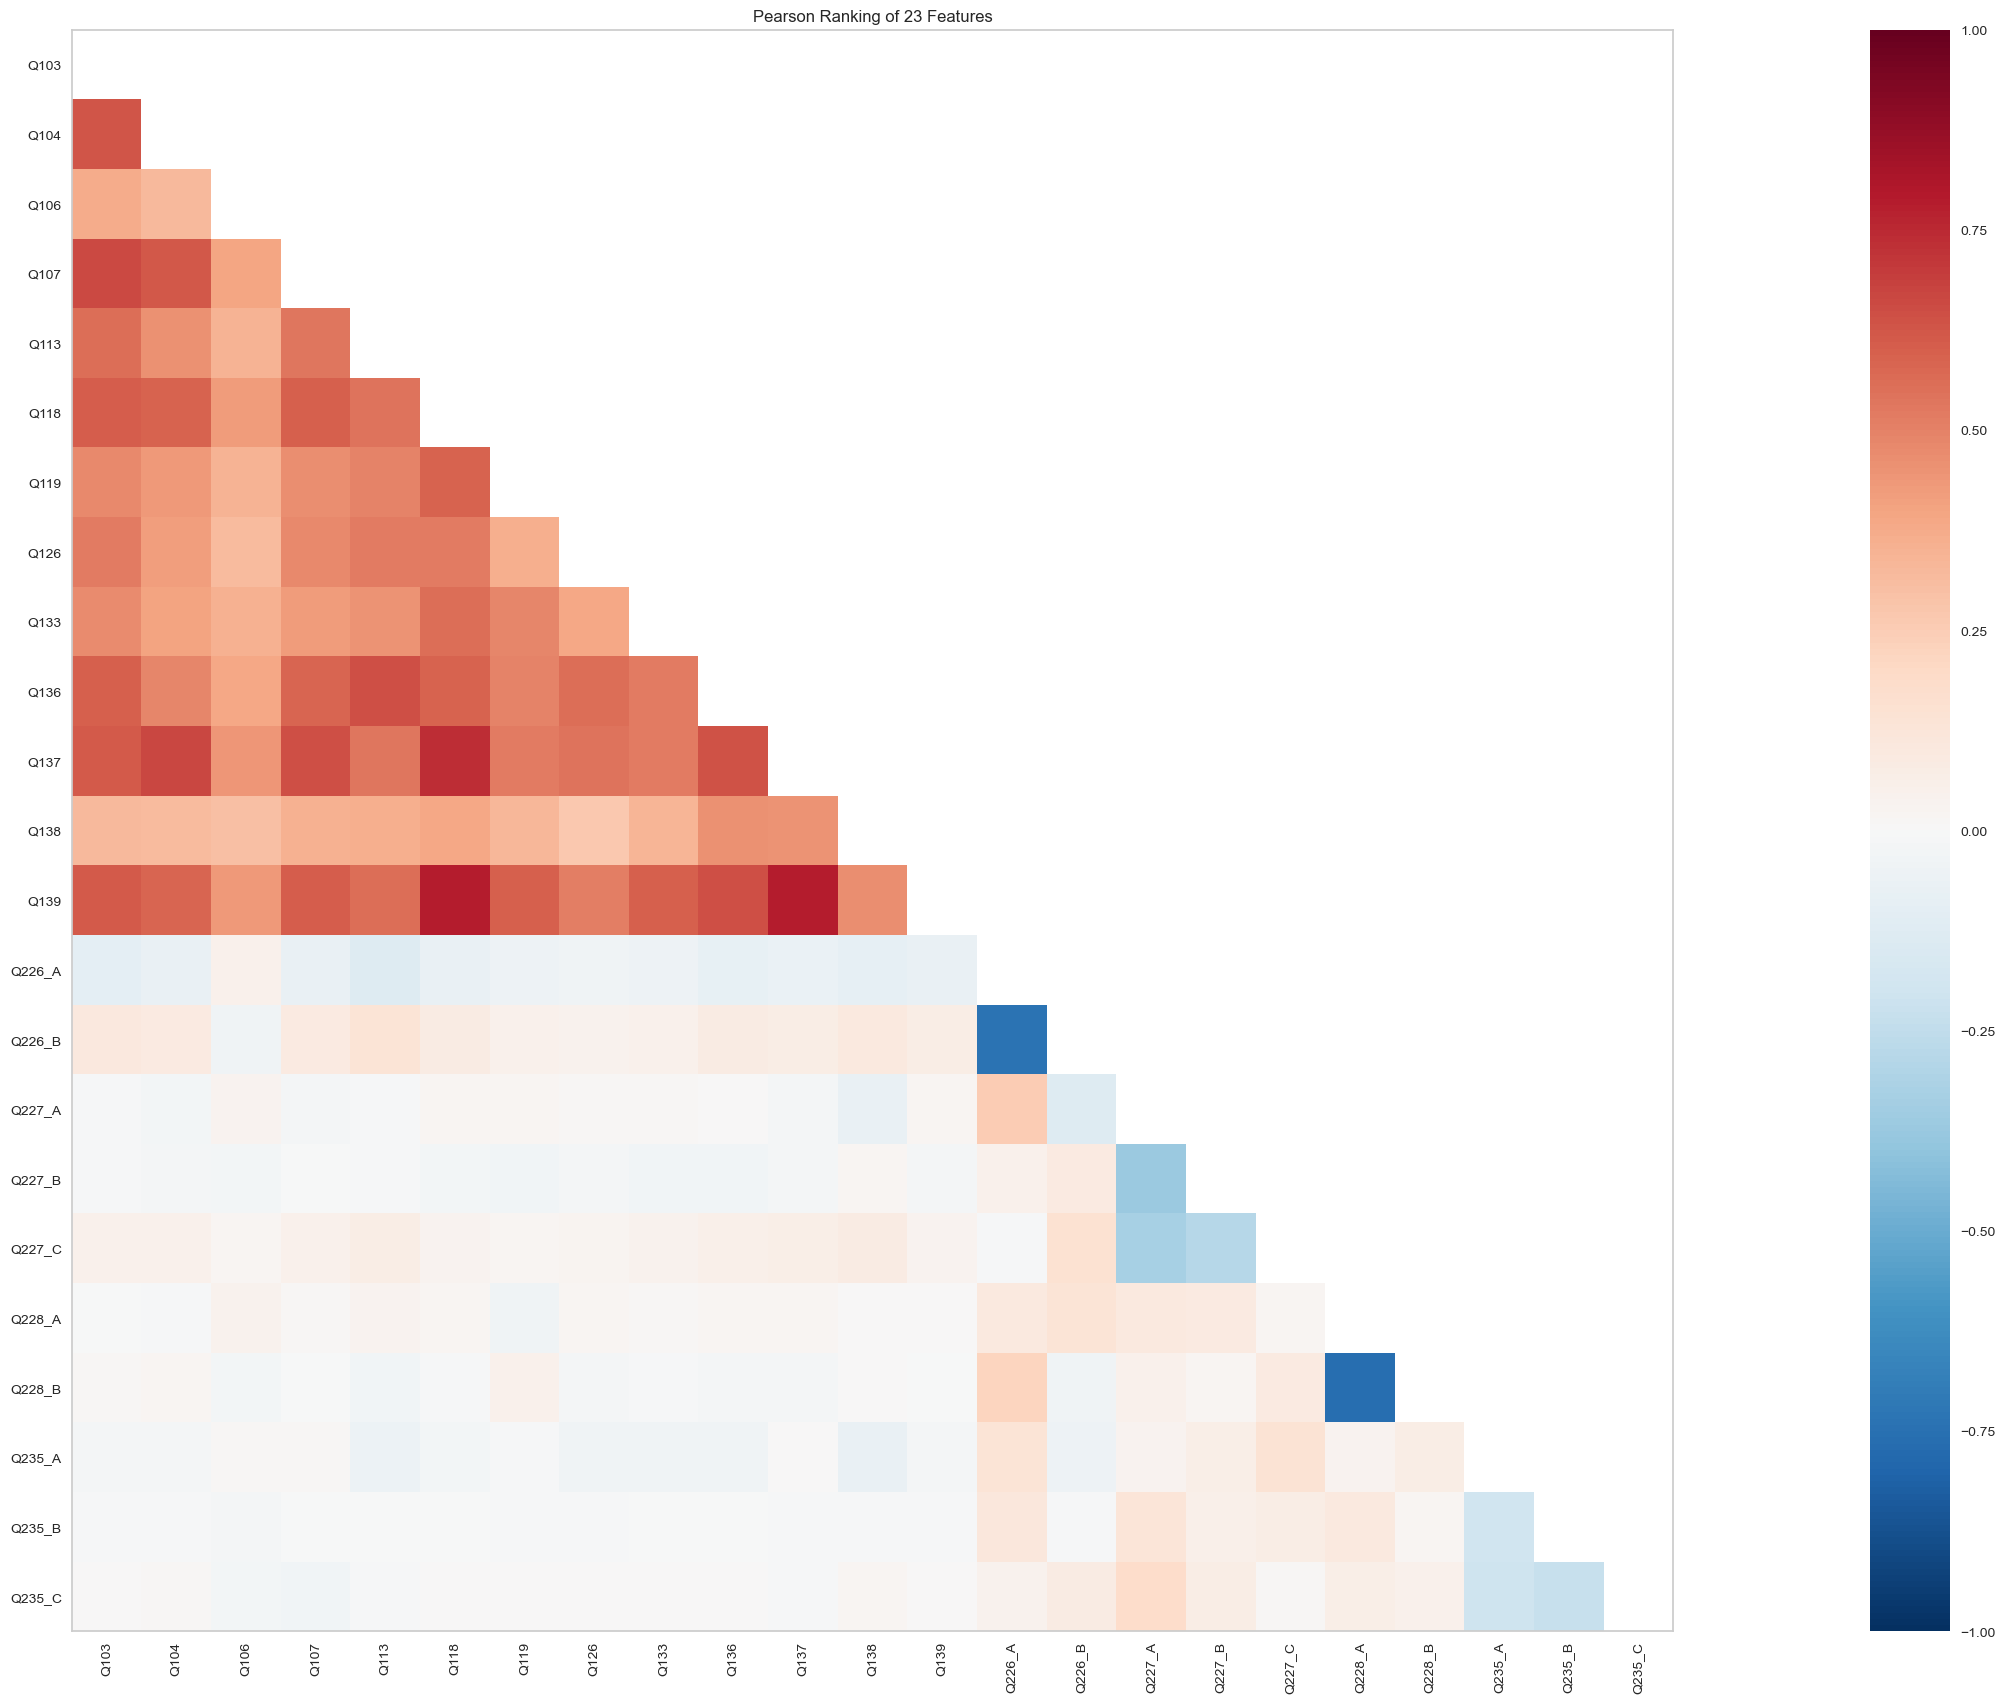

<AxesSubplot:title={'center':'Pearson Ranking of 23 Features'}>

In [26]:
from yellowbrick.features import Rank2D
features = list(X.columns)
# Instantiate the visualizer with the Pearson ranking algorithm
visualizer = Rank2D(algorithm='pearson', features = features, size=(5080, 2080))
visualizer.fit(X,y)
visualizer.transform(X)
visualizer.show()

## y ClassBalance

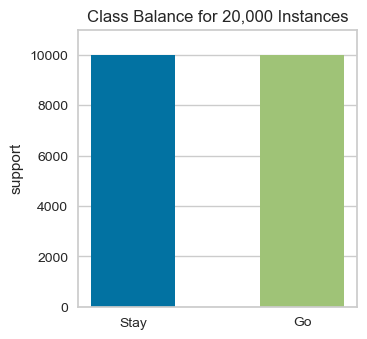

<AxesSubplot:title={'center':'Class Balance for 20,000 Instances'}, ylabel='support'>

In [27]:

from yellowbrick.target import ClassBalance
# Instantiate the visualizer
visualizer = ClassBalance(
    labels=["Stay", "Go"], size=(360, 360)
)

visualizer.fit(y)
visualizer.show()

In [28]:
#split data
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, shuffle=True)

In [29]:
# transform y
LE = LabelEncoder().fit(y)
y_train = LE.transform(y_train)
y_test = LE.transform(y_test)

In [30]:
# transform x
ohe=OneHotEncoder().fit(X)
X_train = ohe.transform(X_train)
X_test = ohe.transform(X_test)

## model evaluations

In [31]:
#to make sure all team members produce the same results across different machines
import numpy as np
np.random.seed(100)

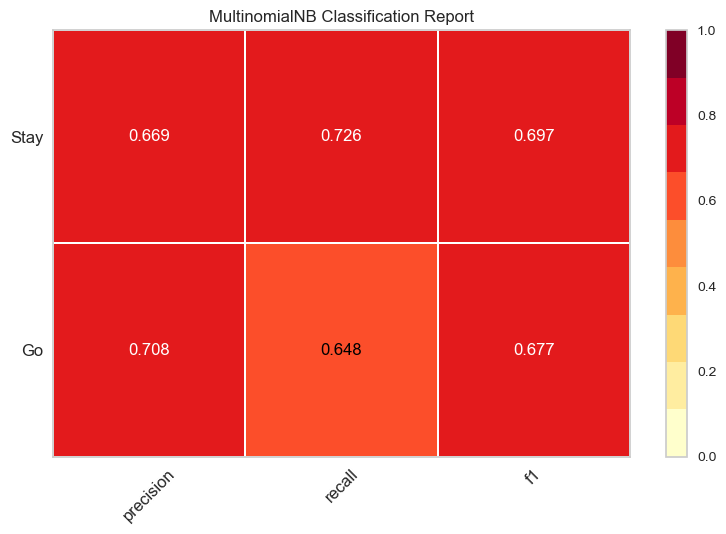

<AxesSubplot:title={'center':'MultinomialNB Classification Report'}>

In [32]:
#MultinomialNB
from sklearn.naive_bayes import MultinomialNB
from yellowbrick.classifier import ClassificationReport
viz = ClassificationReport(MultinomialNB(),classes=LE.classes_)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

## YellowbrickTypeError: could not find feature importances param on MultinomialNB
    from sklearn.naive_bayes import MultinomialNB
from yellowbrick.features import FeatureImportances
viz = FeatureImportances(MultinomialNB(), size=(1080, 720))
viz.fit(X, y)
viz.show()

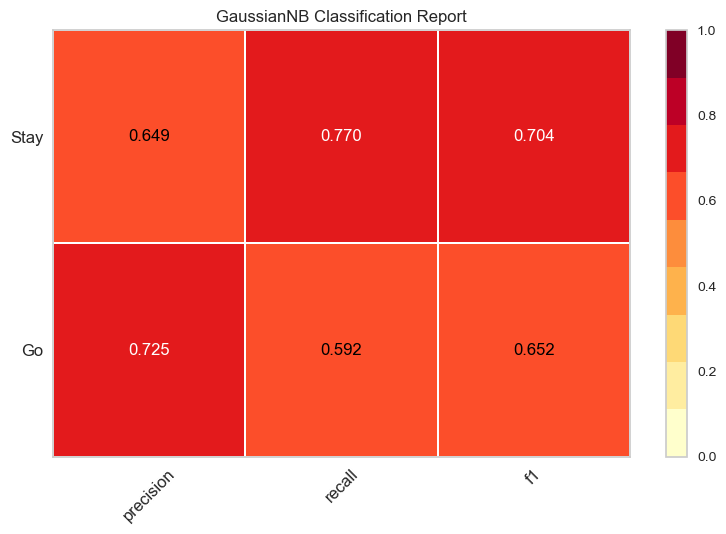

<AxesSubplot:title={'center':'GaussianNB Classification Report'}>

In [33]:
#Try Gaussian NB
import numpy as np
from scipy.sparse import csr_matrix
X_train=csr_matrix(X_train).toarray()
X_test=csr_matrix(X_test).toarray()

from sklearn.naive_bayes import GaussianNB
from yellowbrick.classifier import ClassificationReport
viz = ClassificationReport(GaussianNB(),classes=LE.classes_)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

## YellowbrickTypeError: could not find feature importances param on GaussianNB
    from yellowbrick.features import FeatureImportances
viz = FeatureImportances( GaussianNB(), size=(1080, 2160))
viz.fit(X, y)
viz.show()

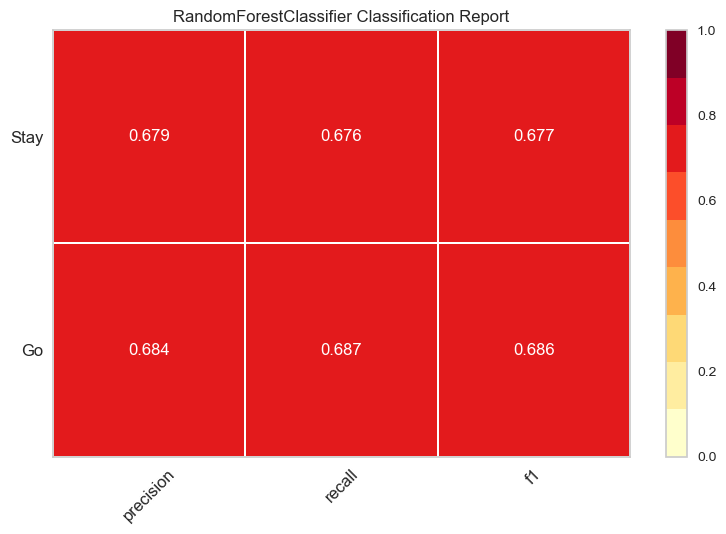

<AxesSubplot:title={'center':'RandomForestClassifier Classification Report'}>

In [34]:
# try RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.classifier import ClassificationReport
viz = ClassificationReport( RandomForestClassifier(n_estimators=100),classes=LE.classes_)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

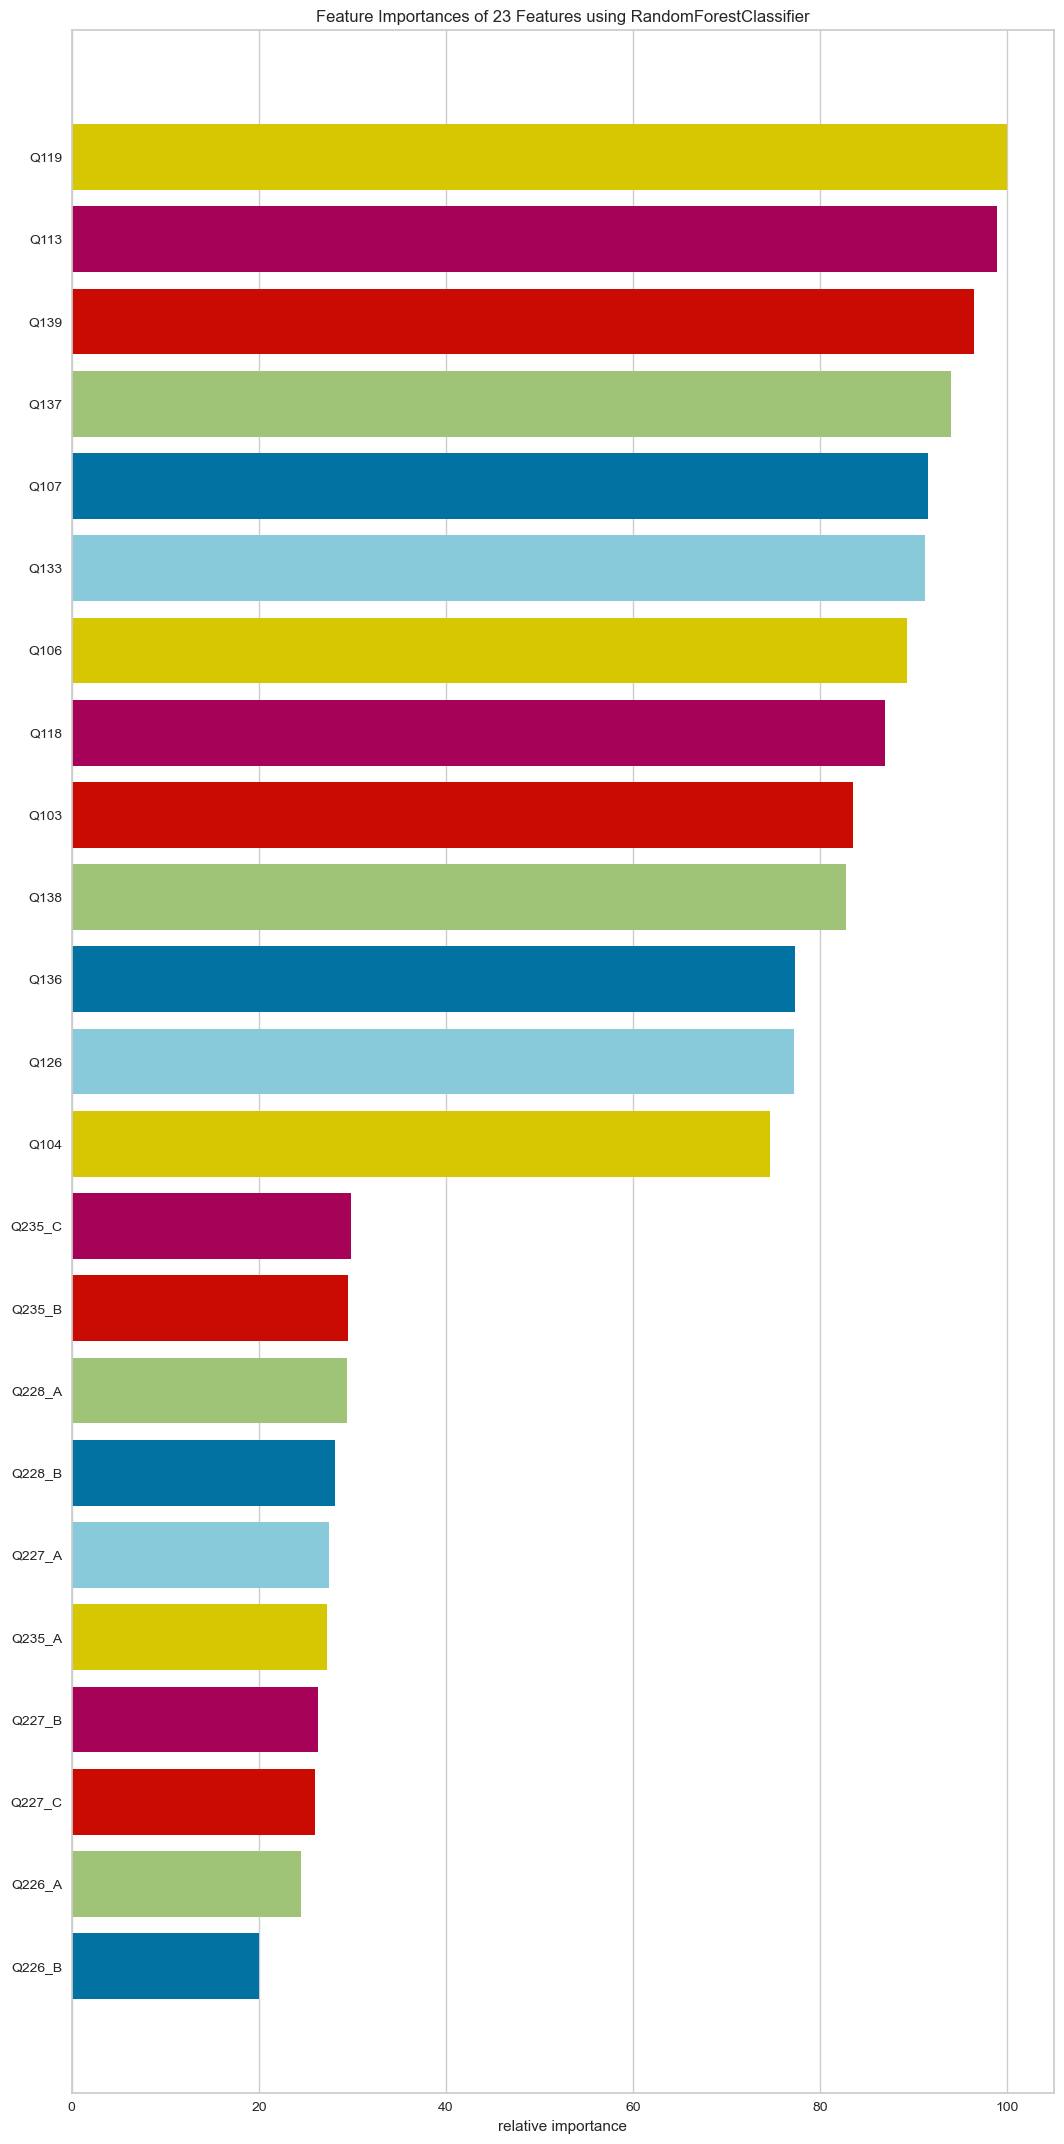

<AxesSubplot:title={'center':'Feature Importances of 23 Features using RandomForestClassifier'}, xlabel='relative importance'>

In [35]:
#FeatureImportances for RandomForestClassifier
from yellowbrick.features import FeatureImportances
viz = FeatureImportances( RandomForestClassifier(n_estimators=100), size=(1080, 2160))
viz.fit(X, y)
viz.show()

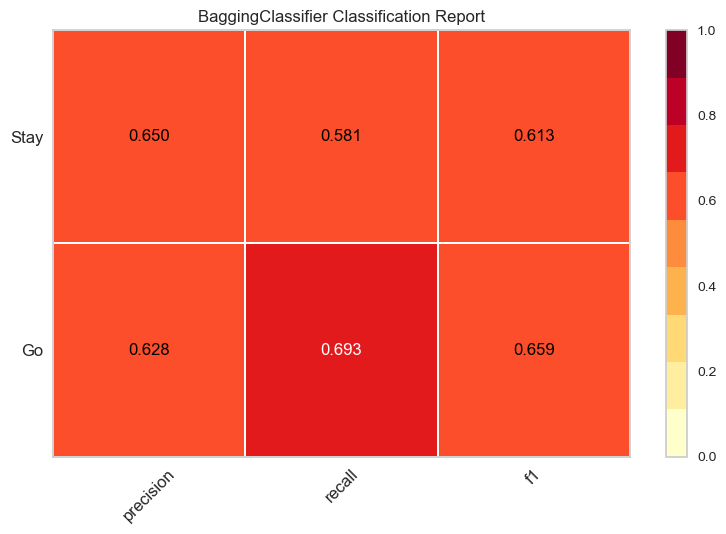

<AxesSubplot:title={'center':'BaggingClassifier Classification Report'}>

In [36]:
#BaggingClassifier
from sklearn.ensemble import BaggingClassifier
from yellowbrick.classifier import ClassificationReport
viz = ClassificationReport(BaggingClassifier(),classes=LE.classes_)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

## YellowbrickTypeError: could not find feature importances param on BaggingClassifier

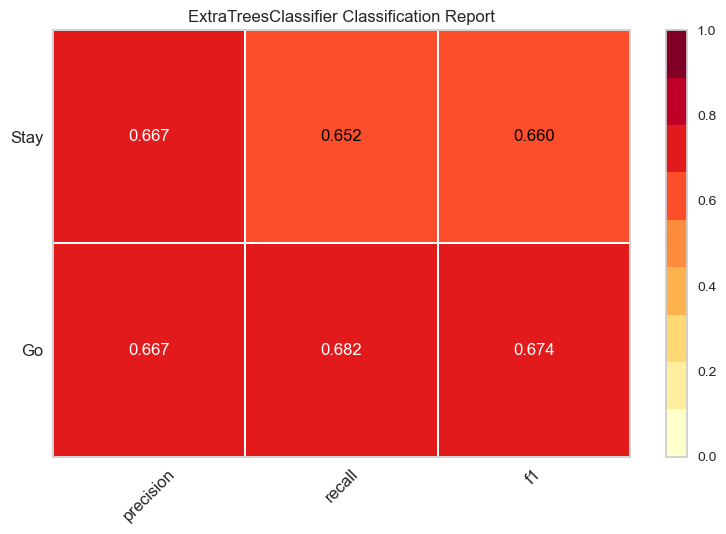

<AxesSubplot:title={'center':'ExtraTreesClassifier Classification Report'}>

In [37]:
#ExtraTreesClassifier()
from sklearn.ensemble import ExtraTreesClassifier
from yellowbrick.classifier import ClassificationReport
viz = ClassificationReport(ExtraTreesClassifier(),classes=LE.classes_)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

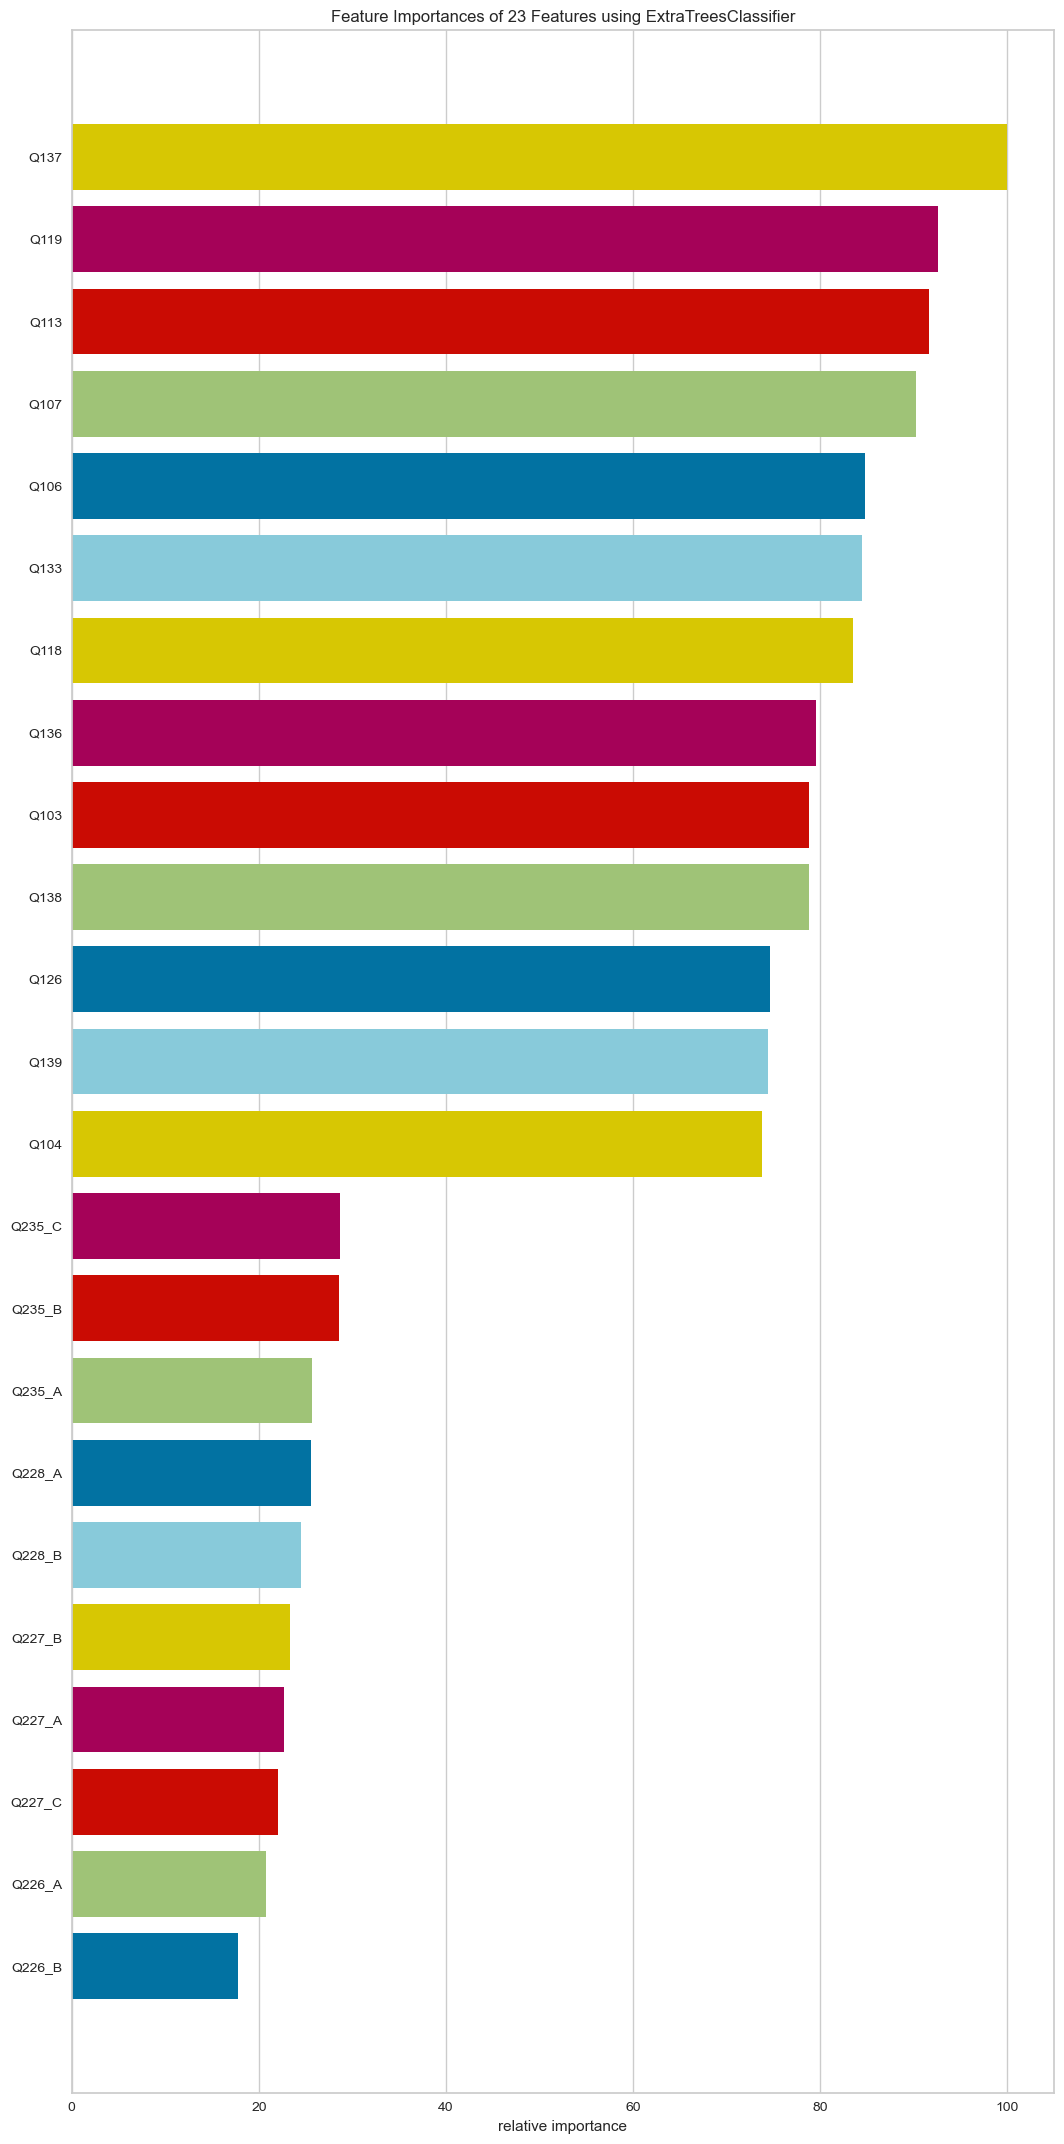

<AxesSubplot:title={'center':'Feature Importances of 23 Features using ExtraTreesClassifier'}, xlabel='relative importance'>

In [38]:
from yellowbrick.features import FeatureImportances
viz = FeatureImportances( ExtraTreesClassifier(), size=(1080, 2160))
viz.fit(X, y)
viz.show()

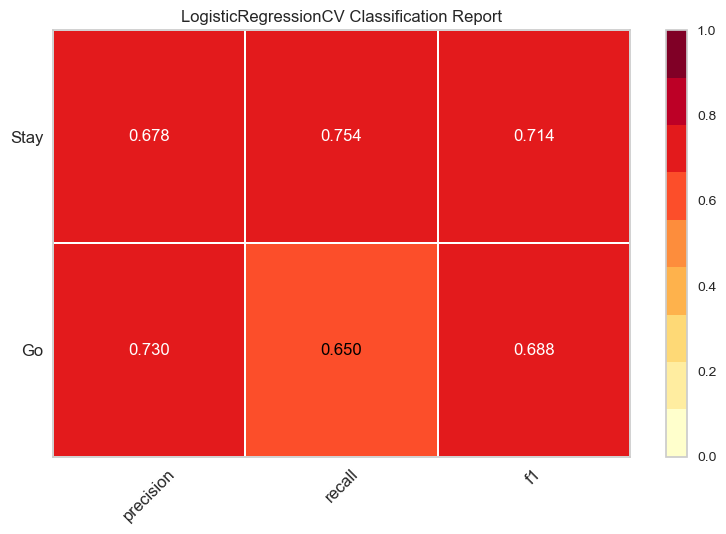

<AxesSubplot:title={'center':'LogisticRegressionCV Classification Report'}>

In [39]:
#LogisticRegressionCV(cv=3)
from yellowbrick.classifier import ClassificationReport
viz = ClassificationReport(LogisticRegressionCV(cv=3),classes=LE.classes_)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

/opt/anaconda3/envs/capstone_env2/lib/python3.10/site-packages/yellowbrick/model_selection/importances.py:194: YellowbrickWarning: detected multi-dimensional feature importances but stack=False, using mean to aggregate them.
  warnings.warn(


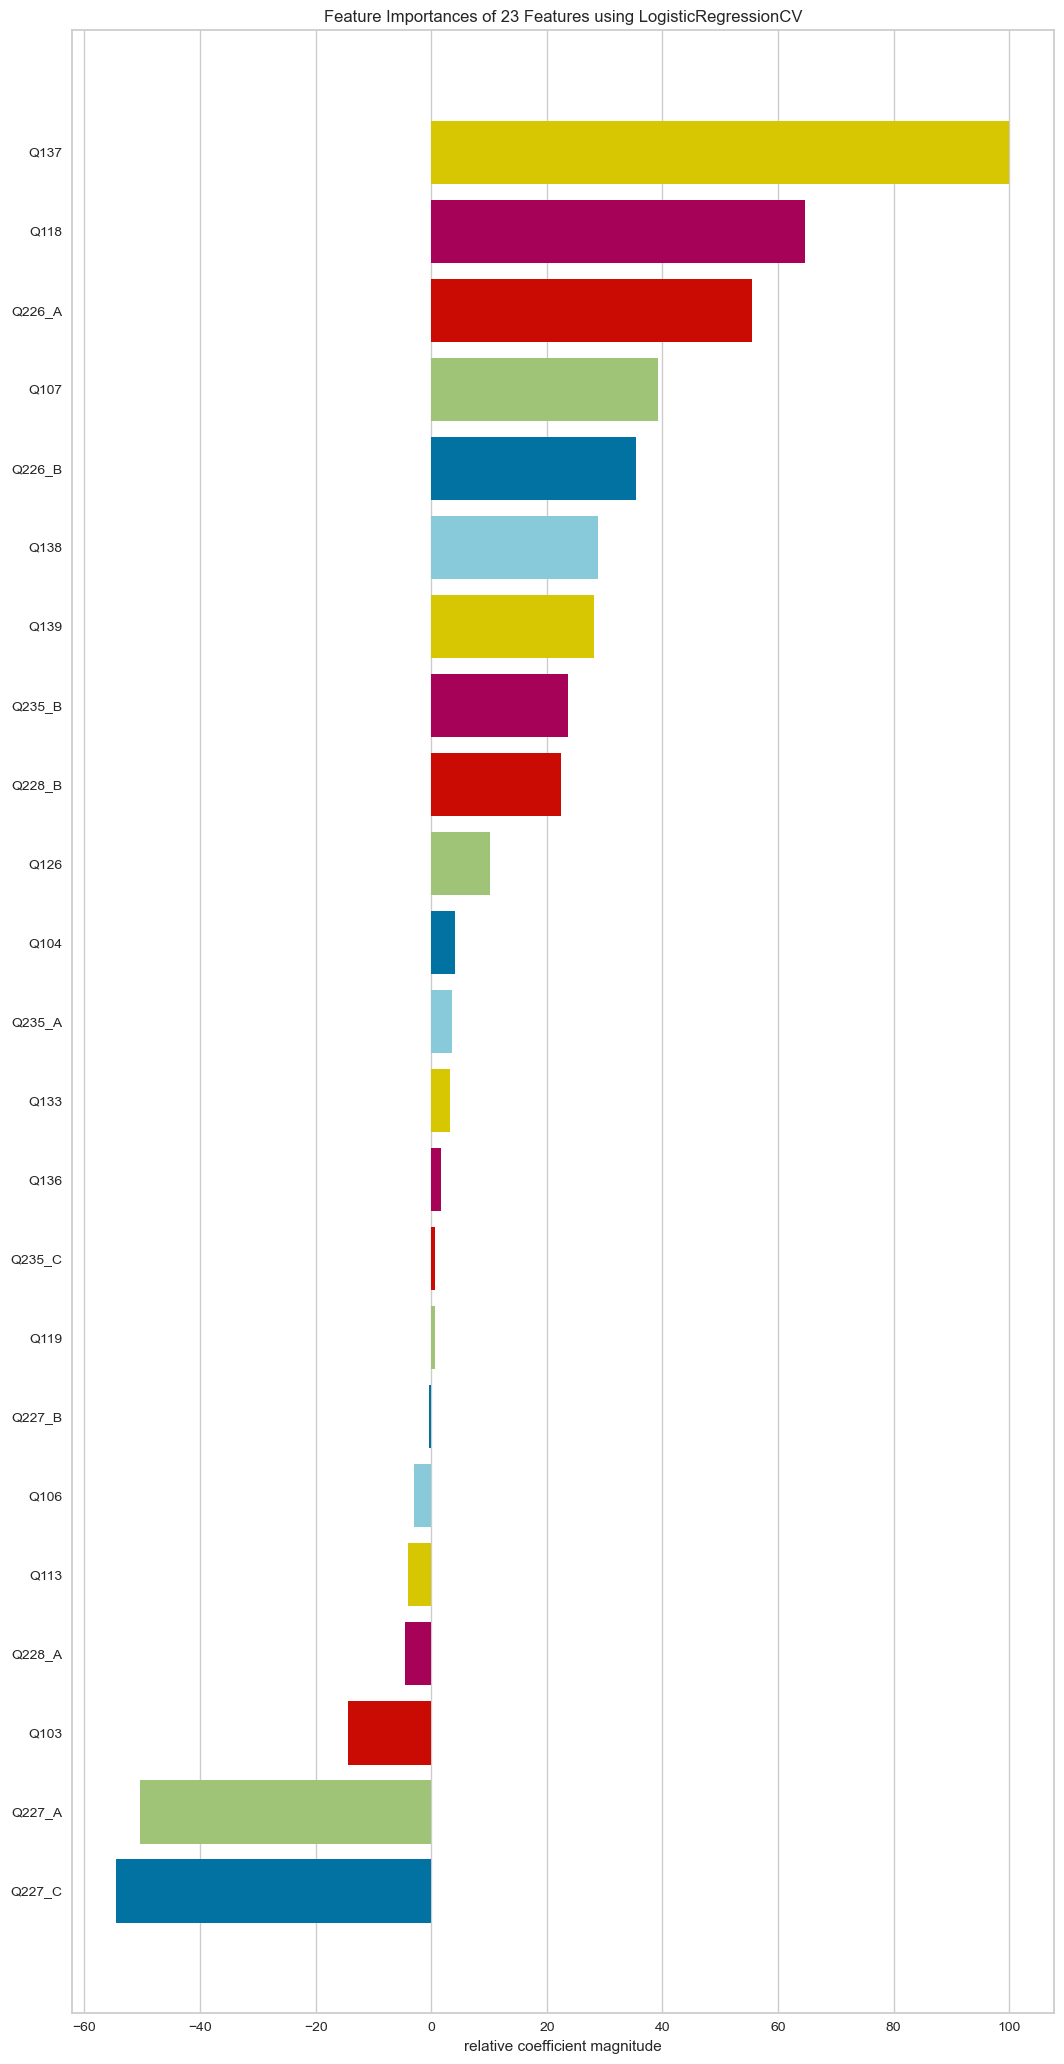

<AxesSubplot:title={'center':'Feature Importances of 23 Features using LogisticRegressionCV'}, xlabel='relative coefficient magnitude'>

In [40]:
#FeatureImportances of LogisticRegressionCV(cv=3)
from yellowbrick.features import FeatureImportances
viz = FeatureImportances( LogisticRegressionCV(cv=3), size=(1080, 2080))
viz.fit(X, y)
viz.show()

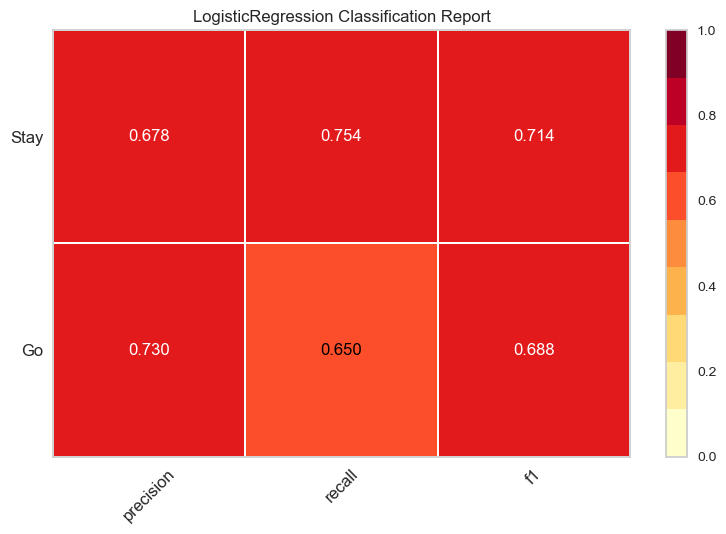

<AxesSubplot:title={'center':'LogisticRegression Classification Report'}>

In [41]:
#LogisticRegression(solver='lbfgs')
from yellowbrick.classifier import ClassificationReport
viz = ClassificationReport( LogisticRegression(solver='lbfgs'),classes=LE.classes_)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

/opt/anaconda3/envs/capstone_env2/lib/python3.10/site-packages/yellowbrick/model_selection/importances.py:194: YellowbrickWarning: detected multi-dimensional feature importances but stack=False, using mean to aggregate them.
  warnings.warn(


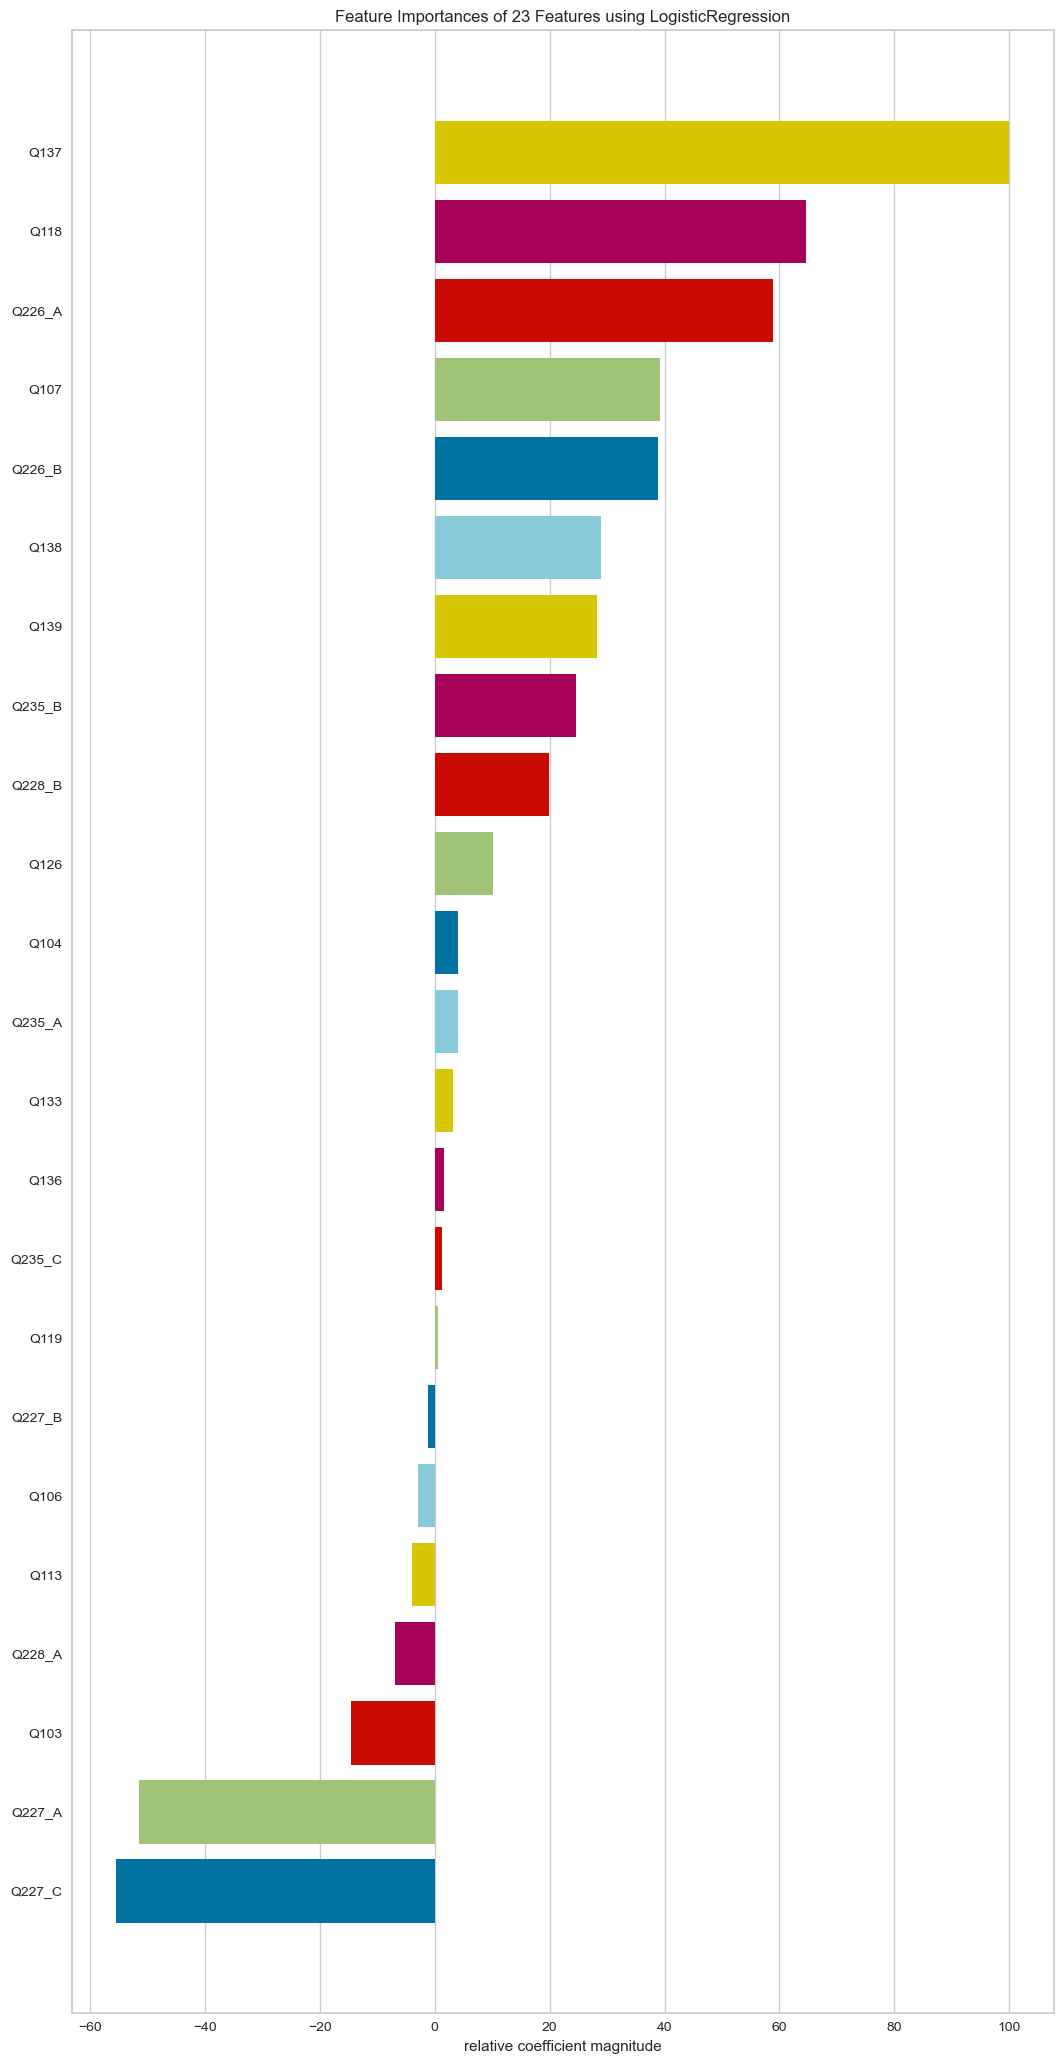

<AxesSubplot:title={'center':'Feature Importances of 23 Features using LogisticRegression'}, xlabel='relative coefficient magnitude'>

In [42]:
from yellowbrick.features import FeatureImportances
viz = FeatureImportances( LogisticRegression(solver='lbfgs'), size=(1080, 2080))
viz.fit(X, y)
viz.show()

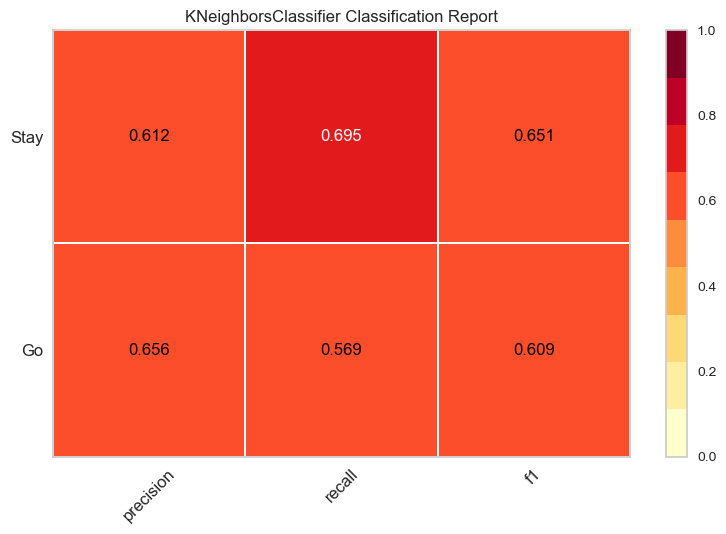

<AxesSubplot:title={'center':'KNeighborsClassifier Classification Report'}>

In [43]:
#KNeighborsClassifier()
from yellowbrick.classifier import ClassificationReport
viz = ClassificationReport( KNeighborsClassifier(),classes=LE.classes_)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

#YellowbrickTypeError: could not find feature importances param on KNeighborsClassifier
    from yellowbrick.features import FeatureImportances
viz = FeatureImportances( KNeighborsClassifier(), size=(1080, 1080))
viz.fit(X, y)
viz.show()

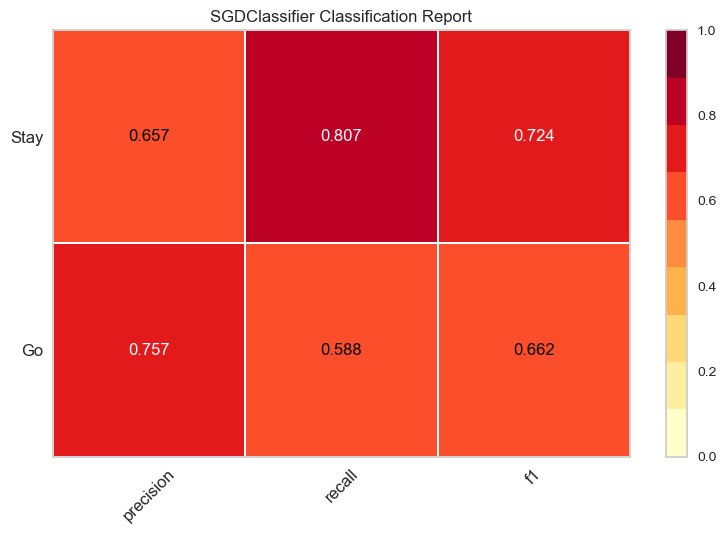

<AxesSubplot:title={'center':'SGDClassifier Classification Report'}>

In [44]:
 #SGDClassifier(max_iter=100, tol=1e-3)
from yellowbrick.classifier import ClassificationReport
viz = ClassificationReport( SGDClassifier(max_iter=100, tol=1e-3),classes=LE.classes_)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

/opt/anaconda3/envs/capstone_env2/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/capstone_env2/lib/python3.10/site-packages/yellowbrick/model_selection/importances.py:194: YellowbrickWarning: detected multi-dimensional feature importances but stack=False, using mean to aggregate them.
  warnings.warn(


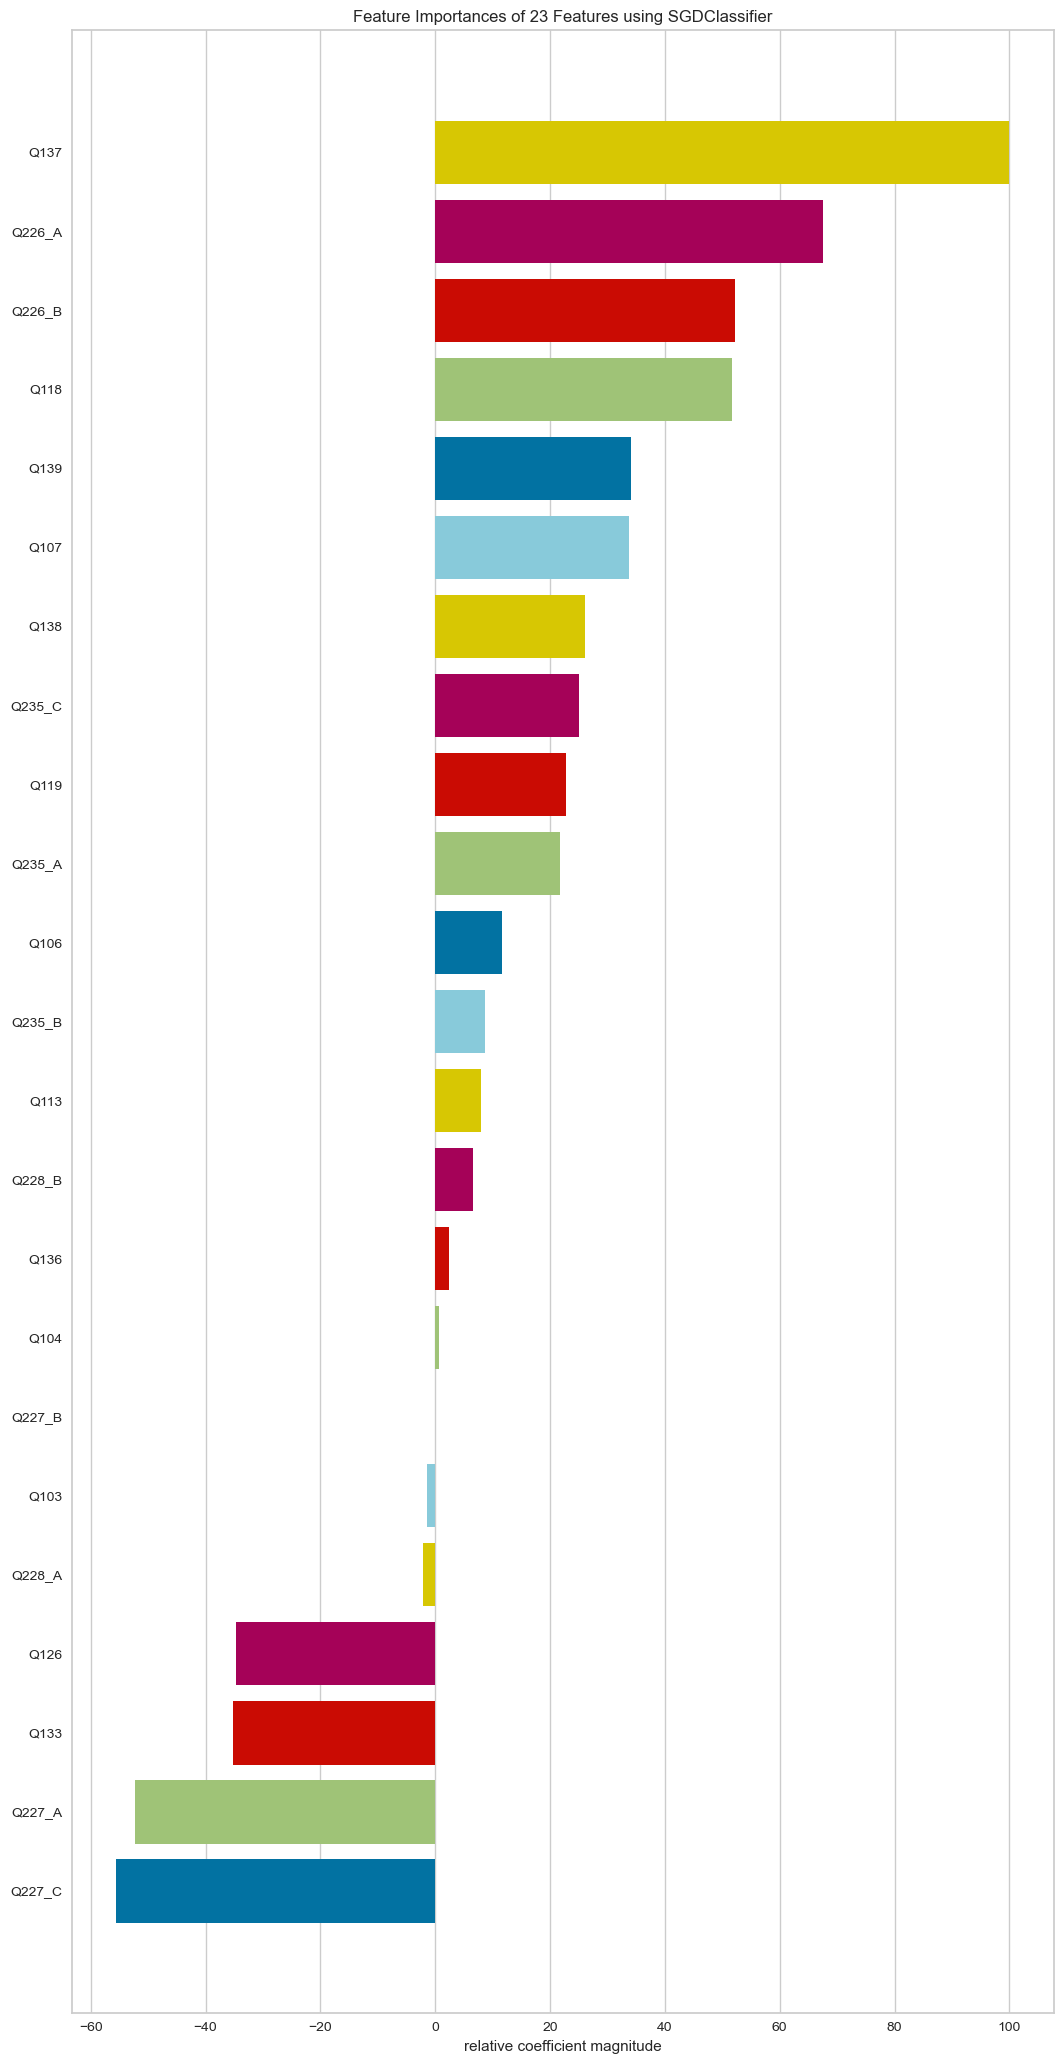

<AxesSubplot:title={'center':'Feature Importances of 23 Features using SGDClassifier'}, xlabel='relative coefficient magnitude'>

In [45]:
from yellowbrick.features import FeatureImportances
viz = FeatureImportances( SGDClassifier(max_iter=100, tol=1e-3), size=(1080, 2080))
viz.fit(X, y)
viz.show()

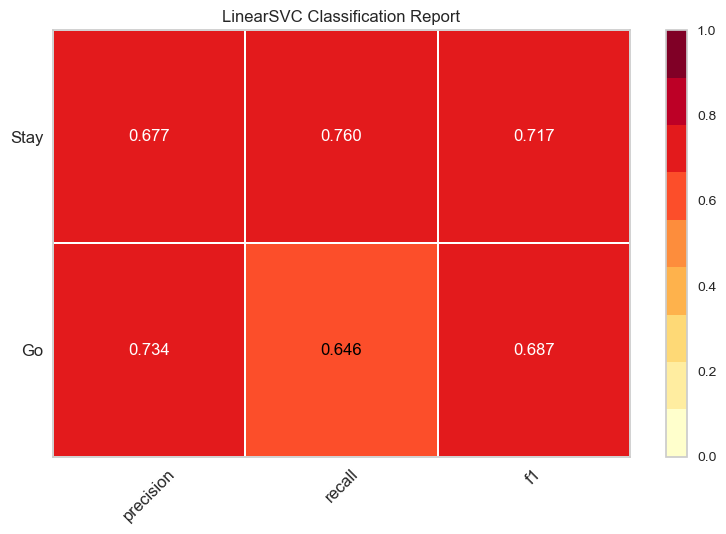

<AxesSubplot:title={'center':'LinearSVC Classification Report'}>

In [46]:
#LinearSVC()
from yellowbrick.classifier import ClassificationReport
viz = ClassificationReport( LinearSVC(),classes=LE.classes_)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

/opt/anaconda3/envs/capstone_env2/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/envs/capstone_env2/lib/python3.10/site-packages/yellowbrick/model_selection/importances.py:194: YellowbrickWarning: detected multi-dimensional feature importances but stack=False, using mean to aggregate them.
  warnings.warn(


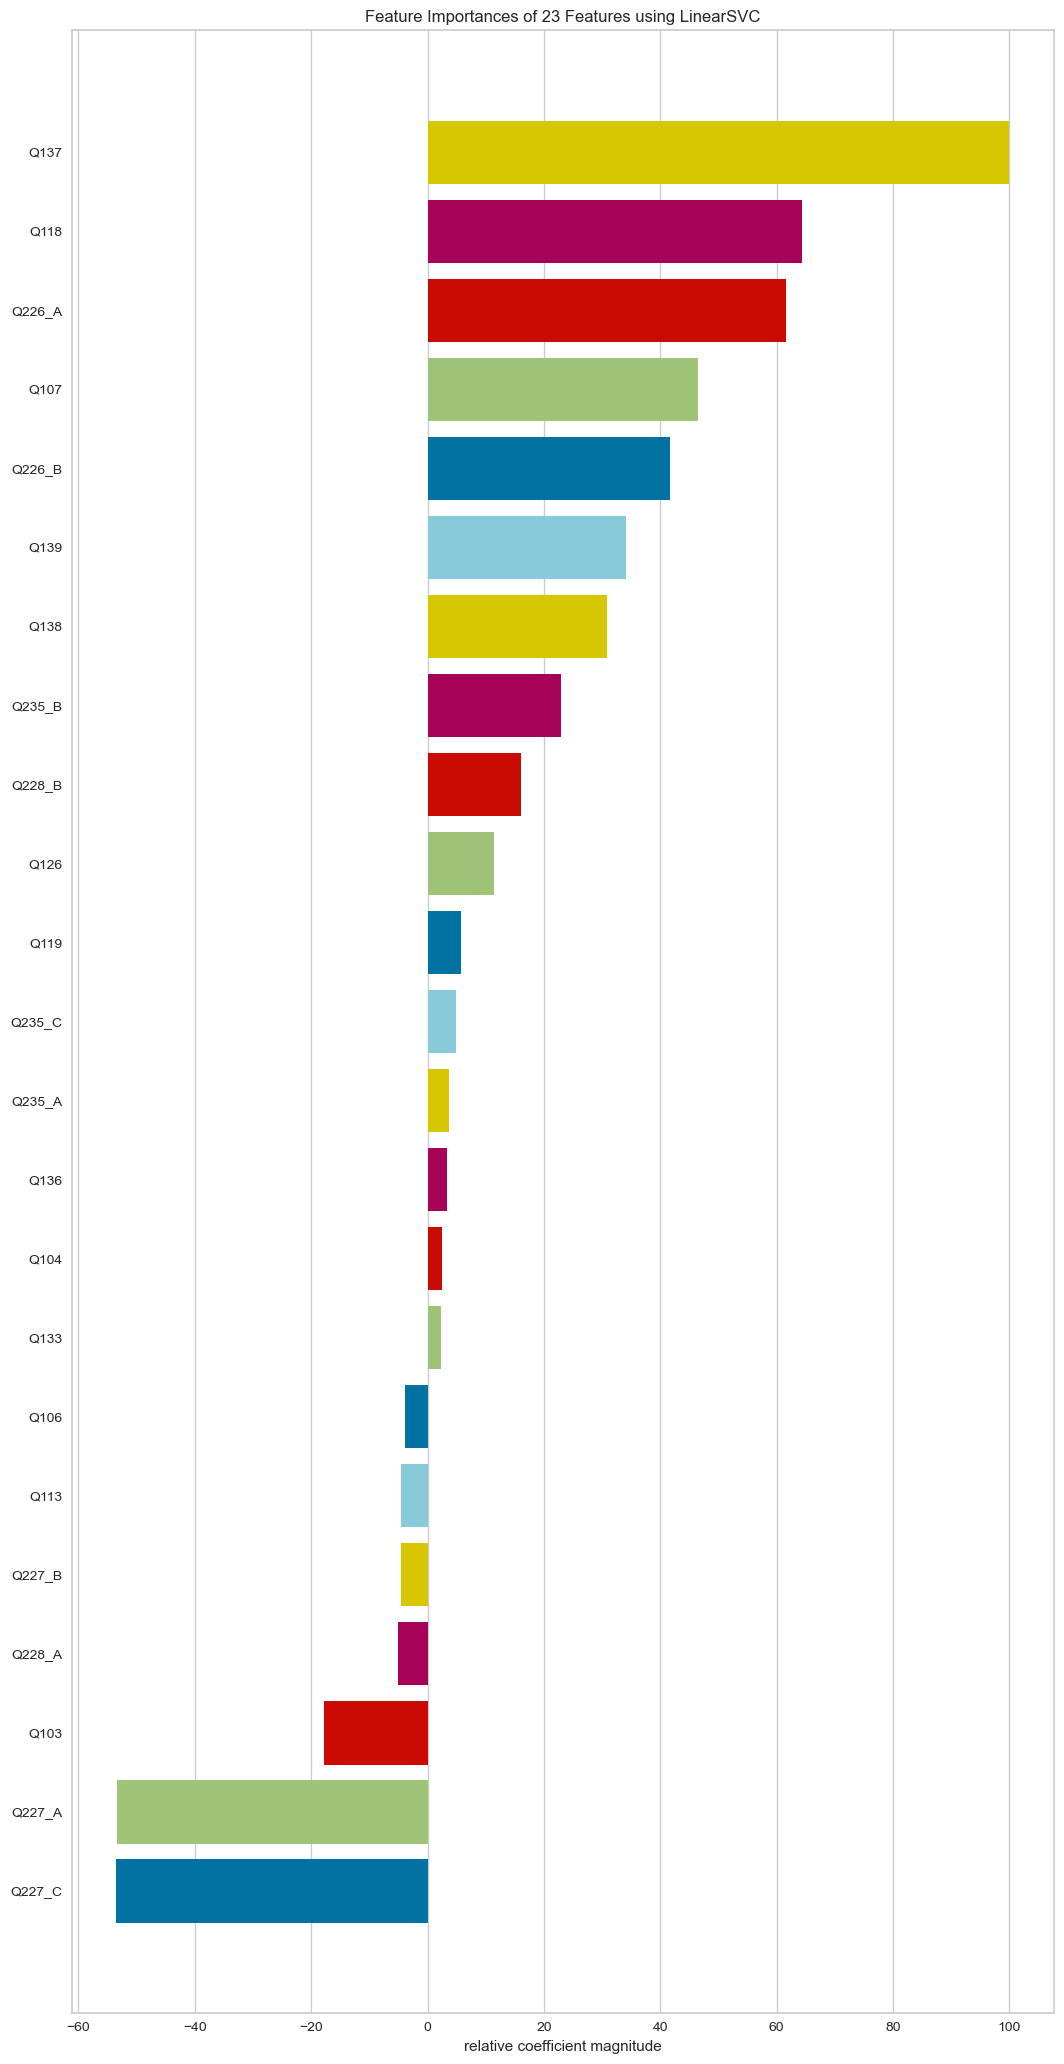

<AxesSubplot:title={'center':'Feature Importances of 23 Features using LinearSVC'}, xlabel='relative coefficient magnitude'>

In [47]:
from yellowbrick.features import FeatureImportances
viz = FeatureImportances( LinearSVC(), size=(1080, 2080))
viz.fit(X, y)
viz.show()

#Notebook takes about 2 minutes to run to this point and then hangs with >10,000 cases.

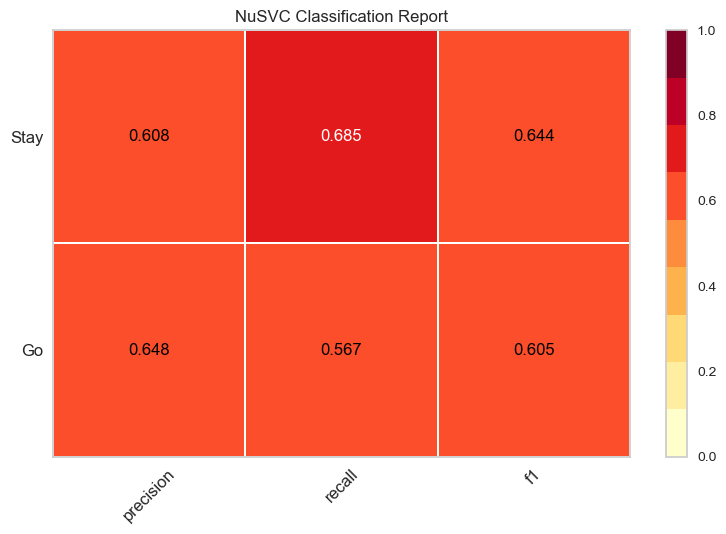

<AxesSubplot:title={'center':'NuSVC Classification Report'}>

In [48]:
NuSVC(gamma='auto')
from yellowbrick.classifier import ClassificationReport
viz = ClassificationReport(NuSVC(gamma='auto'),classes=LE.classes_)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

## YellowbrickTypeError: could not find feature importances param on NuSVC
from yellowbrick.features 
    import FeatureImportances
viz = FeatureImportances( NuSVC(gamma='auto'), size=(1080, 1080))
viz.fit(X, y)
viz.show()

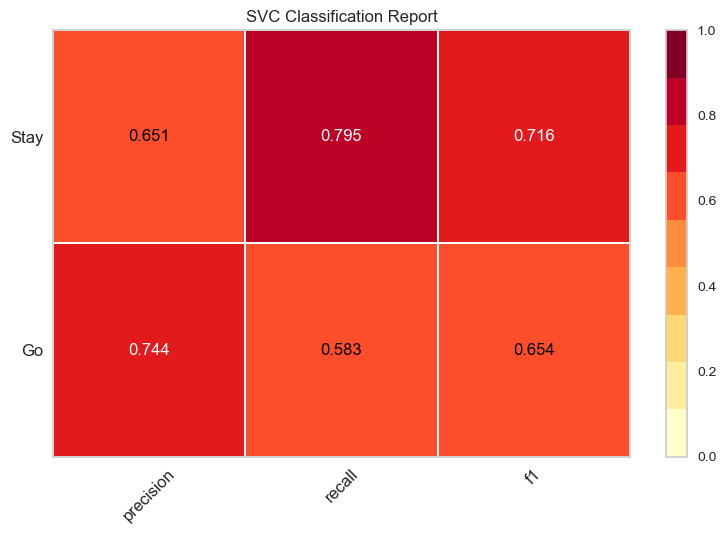

<AxesSubplot:title={'center':'SVC Classification Report'}>

In [49]:
#  #SVC(gamma='auto')
from yellowbrick.classifier import ClassificationReport
viz = ClassificationReport(SVC(gamma='auto'),classes=LE.classes_)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

## YellowbrickTypeError: could not find feature importances param on SVC
from yellowbrick.features import FeatureImportances
viz = FeatureImportances( SVC(gamma='auto'), size=(1080, 1080))
viz.fit(X, y)
viz.show()

## Test various estimators(models).


In [50]:
#Test various estimators, data split at test_size =0.2
e = RandomForestClassifier(n_estimators=100) # e=model

def score_method(X, y, e):
    X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.2)

    LE = LabelEncoder().fit(y)
    y_train = LE.transform(y_train)
    y_test = LE.transform(y_test)

    ohe = OneHotEncoder().fit(X)
    X_train = ohe.transform(X_train)
    X_test = ohe.transform(X_test)
  
    # Instantiate the classification model and visualizer
    e.fit(X_train, y_train)
    expected = y_test
    predicted = e.predict(X_test)
    # Compute and return F1 (harmonic mean of precision and recall) 
    print("{}: {}".format(e.__class__.__name__, f1_score(expected, predicted)))

In [51]:
#to make sure all team members produce the same results across different machines
import numpy as np
np.random.seed(100)

## f1_scores
consider gamma='scale' to improve speed?

In [52]:
# Try them all!
models = [MultinomialNB(),
    SVC(gamma='auto'), NuSVC(gamma='auto'), 
          LinearSVC(), 
    SGDClassifier(max_iter=100, tol=1e-3), KNeighborsClassifier(), 
    LogisticRegression(solver='lbfgs'), LogisticRegressionCV(cv=3), 
    BaggingClassifier(), ExtraTreesClassifier(n_estimators=100), 
    RandomForestClassifier(n_estimators=100)
]

for model in models:
    score_method(X, y, model)

MultinomialNB: 0.6991150442477876
SVC: 0.7109090909090909
NuSVC: 0.6623042767001636
LinearSVC: 0.7055214723926381
SGDClassifier: 0.688
KNeighborsClassifier: 0.6652592071311283
LogisticRegression: 0.711864406779661
LogisticRegressionCV: 0.706183170618317
BaggingClassifier: 0.6097430406852249
ExtraTreesClassifier: 0.668984355599702
RandomForestClassifier: 0.680285503322668


In [53]:
    import numpy as np
    np.random.seed(100)
    from sklearn.model_selection import train_test_split as tts
    X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.2)

    LE = LabelEncoder().fit(y)
    y_train = LE.transform(y_train)
    y_test = LE.transform(y_test)

    ohe = OneHotEncoder().fit(X)
    X_train = ohe.transform(X_train)
    X_test = ohe.transform(X_test)
    from scipy.sparse import csr_matrix
    X_train=csr_matrix(X_train).toarray()
    X_test=csr_matrix(X_test).toarray()
    # Instantiate the classification model and visualizer
    e=GaussianNB()
    e.fit(X_train, y_train)
    expected = y_test
    predicted = e.predict(X_test)
    # Compute and return F1 (harmonic mean of precision and recall) 
    print("GaussianNB")
    print(f1_score(expected, predicted))


GaussianNB
0.7097631171131281


## f1 scores with TINY_2 DF n=20,000:<br>
**GaussianNB 0.7097631171131281**<br>
MultinomialNB: 0.6991150442477876<br>
**SVC: 0.7109090909090909**<br>
NuSVC: 0.6623042767001636<br>
LinearSVC: 0.7055214723926381<br>
SGDClassifier: 0.688<br>
KNeighborsClassifier: 0.6652592071311283<br>
**LogisticRegression: 0.711864406779661**<br>
**LogisticRegressionCV: 0.706183170618317**<br>
BaggingClassifier: 0.6097430406852249<br>
ExtraTreesClassifier: 0.668984355599702<br>
RandomForestClassifier: 0.680285503322668<br>

## f1 scores with TINY DF n=20,000:<br>

**GaussianNB 0.7118568232662192**<br>
MultinomialNB: 0.6911660777385159<br>
**SVC: 0.698822463768116**<br>
NuSVC: 0.6727357609710551<br>
**LinearSVC: 0.6989042401143402**<br>
**SGDClassifier: 0.7265934065934065**<br>
KNeighborsClassifier: 0.6573201562859112<br>
LogisticRegression: 0.6937426210153483<br>
LogisticRegressionCV: 0.7103954534690978<br>
BaggingClassifier: 0.6200052232958997<br>
ExtraTreesClassifier: 0.6773556980759744<br>

## f1 scores with MEDIUM DF n=20,000:<br>
**GaussianNB 0.7009142359599477**<br>
MultinomialNB: 0.6847902507616592<br>
**SVC: 0.7109879963065558**<br>
NuSVC: 0.6829152863227638<br>
LinearSVC: 0.6909892262487757<br>
SGDClassifier: 0.6827270537219946<br>
KNeighborsClassifier: 0.6684539767649688<br>
**LogisticRegression: 0.6967430639324487**<br>
**LogisticRegressionCV: 0.7102715466351831**<br>
BaggingClassifier: 0.6299337748344371<br>
ExtraTreesClassifier: 0.6841066140177688<br>
RandomForestClassifier: 0.6726190476190476<br>


## f1 scores with MEDIUM DF n=10,000:<br>
**GaussianNB 0.6991581745680107**<br>
MultinomialNB: 0.6753749395258829<br>
**SVC: 0.7172413793103448**<br>
NuSVC: 0.669806877060763<br>
**LinearSVC: 0.7001915708812261**<br>
**SGDClassifier: 0.6982429335370512**<br>
KNeighborsClassifier: 0.6609012289485662<br>
LogisticRegression: 0.6887481734047735<br>
LogisticRegressionCV: 0.6962457337883959<br>
BaggingClassifier: 0.6338397066526977<br>
ExtraTreesClassifier: 0.6710393541876892<br>
RandomForestClassifier: 0.6726190476190476<br>

## f1 scores with LARGE DF n=6,000:<br><br>
**GaussianNB:0.7038869257950531**<br>
MultinomialNB: 0.668769716088328<br>
**SVC: 0.7124528301886792**<br>
NuSVC: 0.6798732171156893<br>
LinearSVC: 0.6600985221674877<br>
SGDClassifier: 0.5042735042735043<br>
KNeighborsClassifier: 0.653179190751445<br>
LogisticRegression: 0.6661341853035143<br>
LogisticRegressionCV: 0.7061574434918161<br>
BaggingClassifier: 0.6313932980599646<br>
**ExtraTreesClassifier: 0.6885245901639345**<br>
**RandomForestClassifier: 0.6800966962127316**<br>

#Try SVC
from sklearn.svm import SVC
from yellowbrick.classifier import ClassificationReport
model = SVC(kernel="poly", degree=3, decision_function_shape='ovo')
viz = ClassificationReport(model,classes=LE.classes_)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

## ClassPredictionError

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from yellowbrick.classifier import ClassPredictionError



e=RandomForestClassifier(n_estimators=10)
def prediction_error(X,y,e):
    classes = ['Stay', 'Go']

# Perform 80/20 training/test split
    X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20)

# Instantiate the classification model and visualizer
    visualizer = ClassPredictionError(
    e, 
    classes=classes, size=(360, 360)
    )

# Fit the training data to the visualizer
    visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
    visualizer.score(X_test, y_test)

# Draw visualization
    visualizer.show()
#prediction_error(X,y,e)

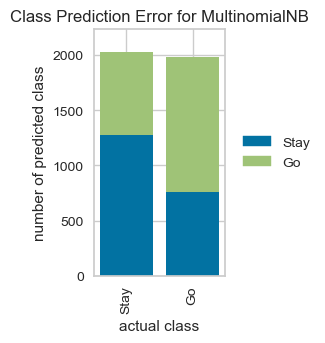

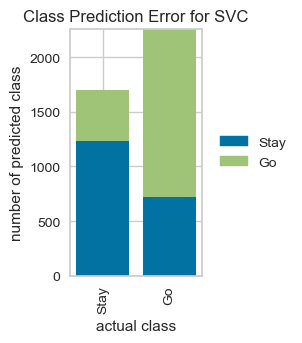

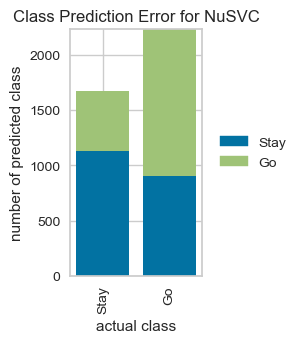

/opt/anaconda3/envs/capstone_env2/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


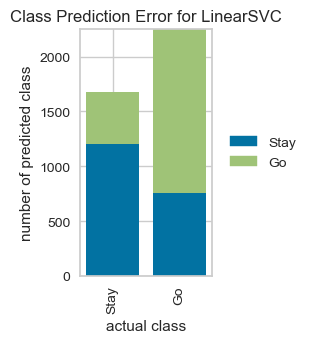

/opt/anaconda3/envs/capstone_env2/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


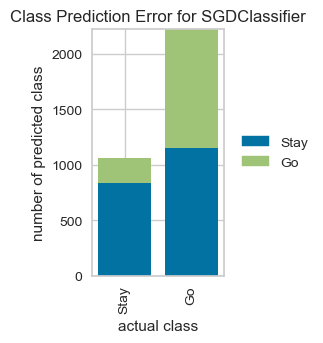

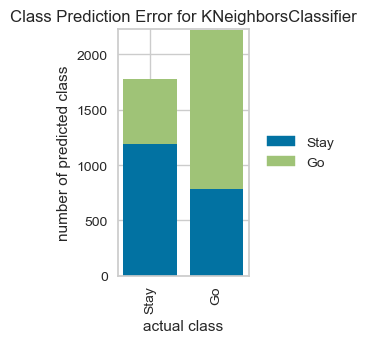

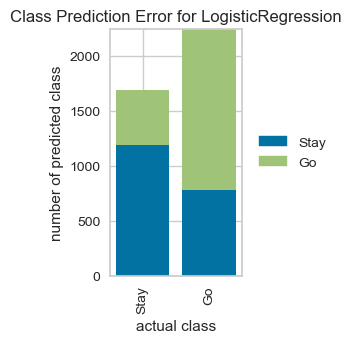

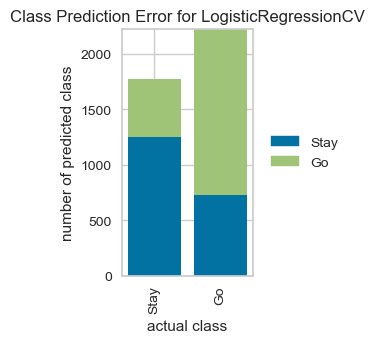

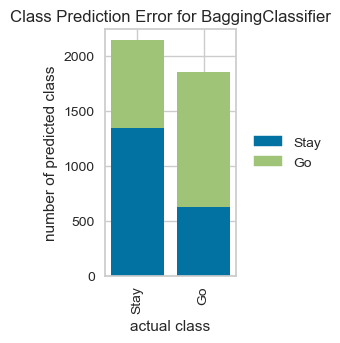

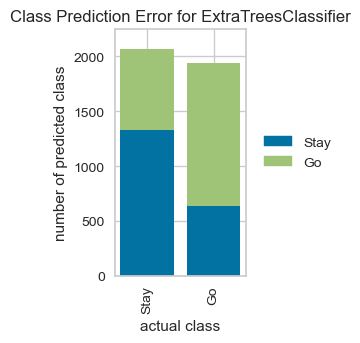

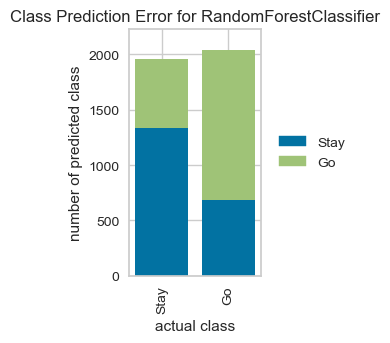

In [55]:
models = [MultinomialNB(),
    SVC(gamma='auto'), NuSVC(gamma='auto'), 
          LinearSVC(), 
    SGDClassifier(max_iter=100, tol=1e-3), KNeighborsClassifier(), 
    LogisticRegression(solver='lbfgs'), LogisticRegressionCV(cv=3), 
    BaggingClassifier(), ExtraTreesClassifier(n_estimators=100), 
    RandomForestClassifier(n_estimators=100)
]

for model in models:
    prediction_error(X, y, model)

## Cross Validation

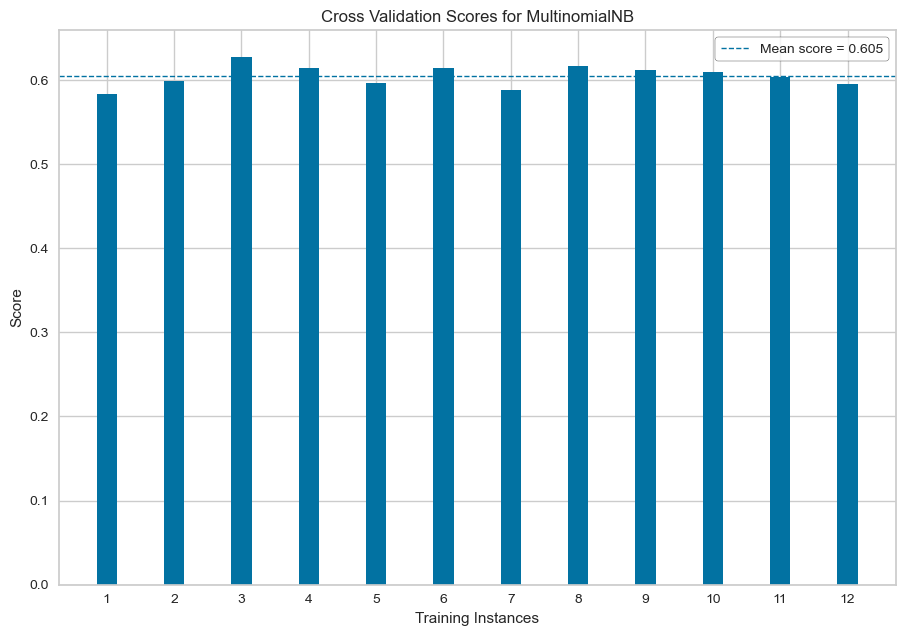

In [56]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import StratifiedKFold

from yellowbrick.model_selection import CVScores

# Load the classification data set
model= MultinomialNB()
def cross_validation(X, y,model):
# Create a cross-validation strategy
#cv = StratifiedKFold(n_splits=12, random_state=42)
    cv = StratifiedKFold(n_splits=12)
# Instantiate the classification model and visualizer

    visualizer = CVScores(
    model, cv=cv, scoring='f1_weighted', size=(1080, 720)
    )

    visualizer.fit(X, y)
    visualizer.show()
cross_validation(X, y,model)

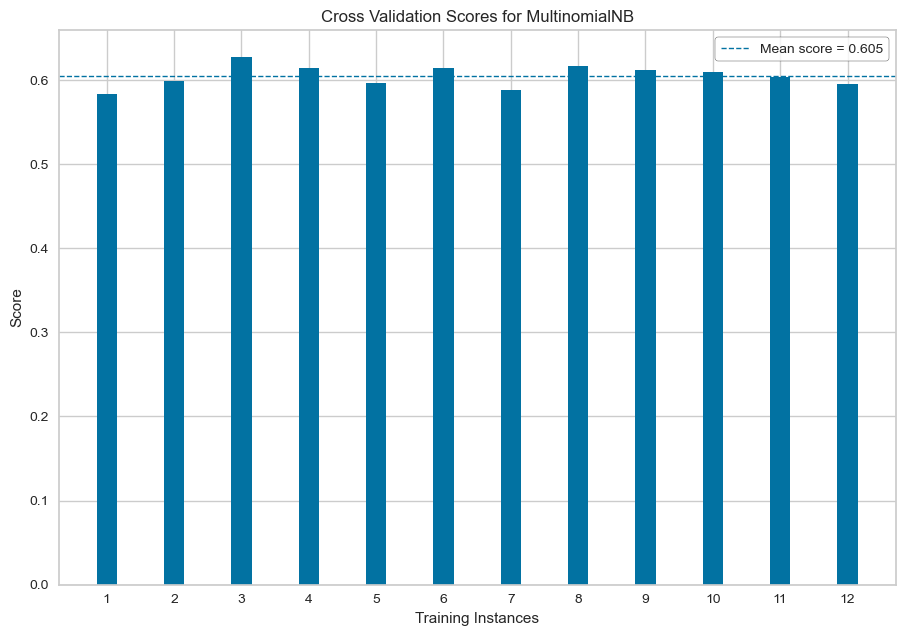

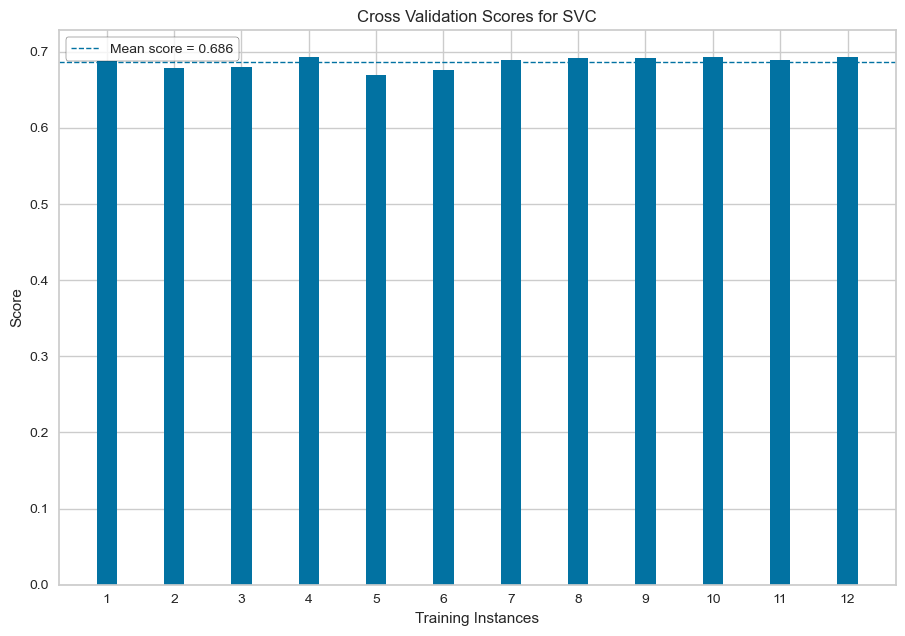

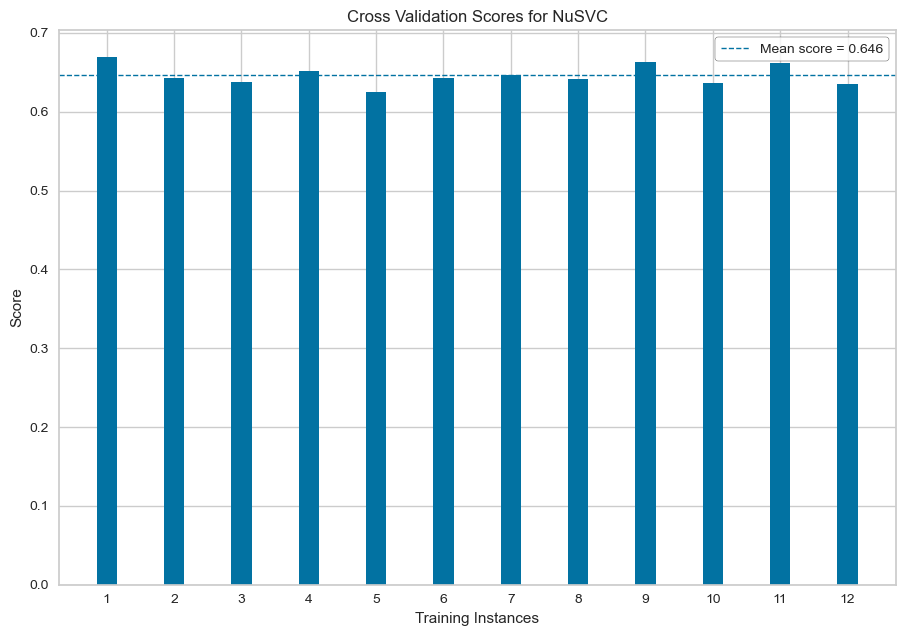

/opt/anaconda3/envs/capstone_env2/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/envs/capstone_env2/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/envs/capstone_env2/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/envs/capstone_env2/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/envs/capstone_env2/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/envs/capstone_env2/lib/py

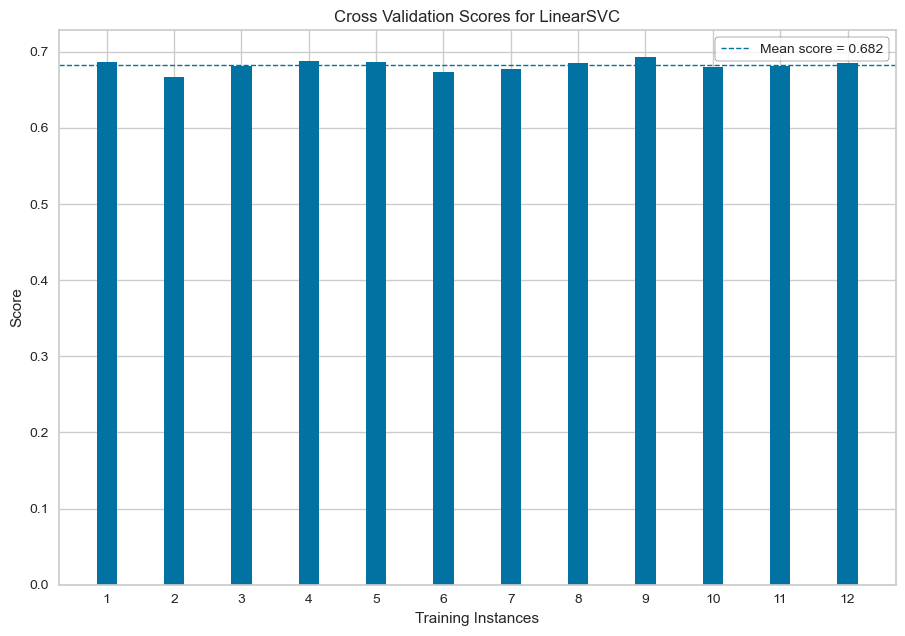

/opt/anaconda3/envs/capstone_env2/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/capstone_env2/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/capstone_env2/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/capstone_env2/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fi

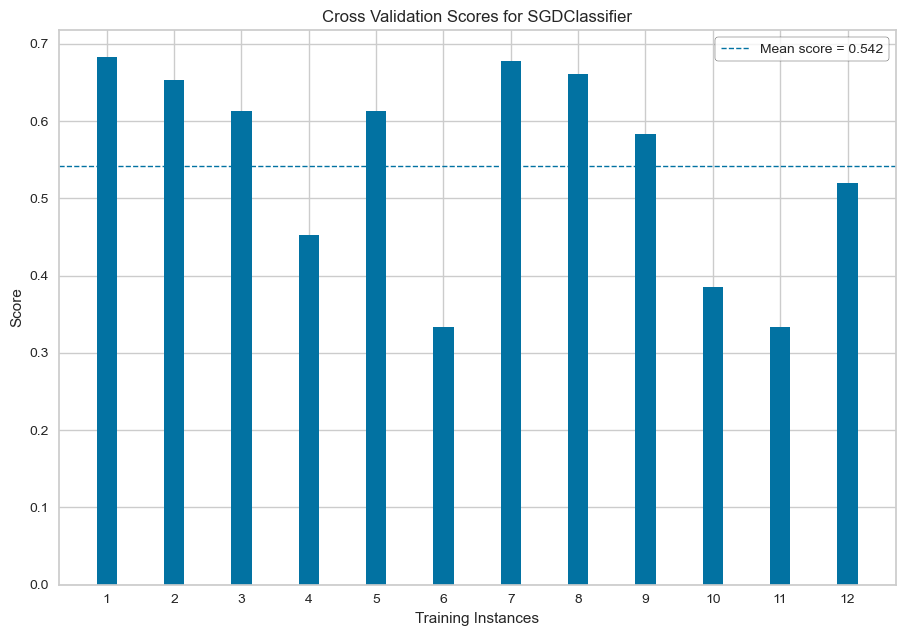

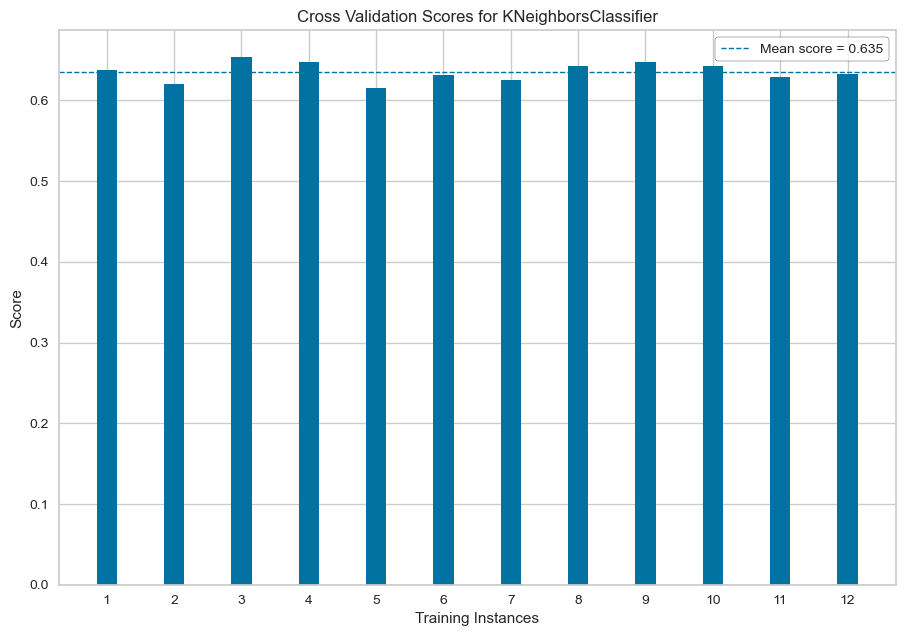

/opt/anaconda3/envs/capstone_env2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


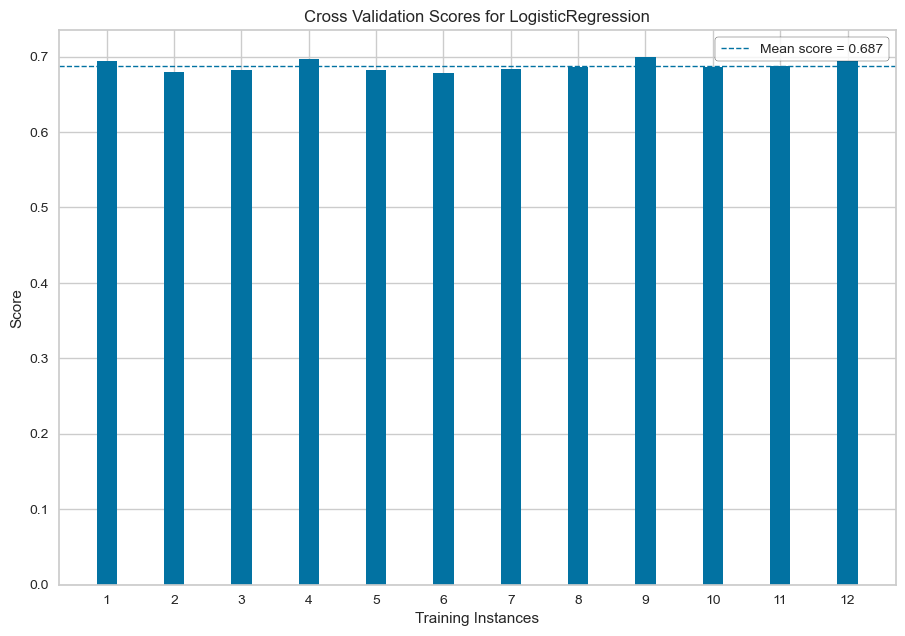

/opt/anaconda3/envs/capstone_env2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/capstone_env2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

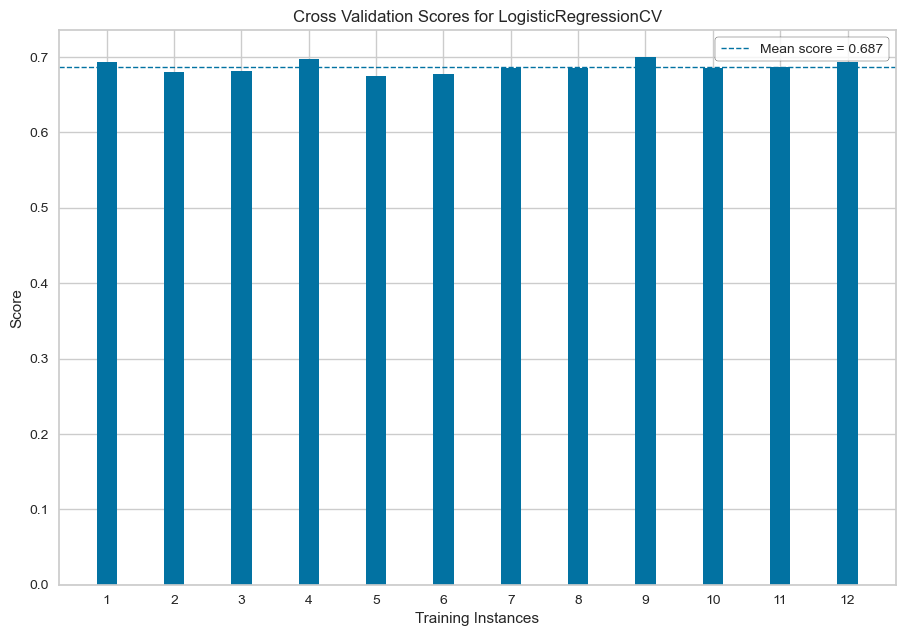

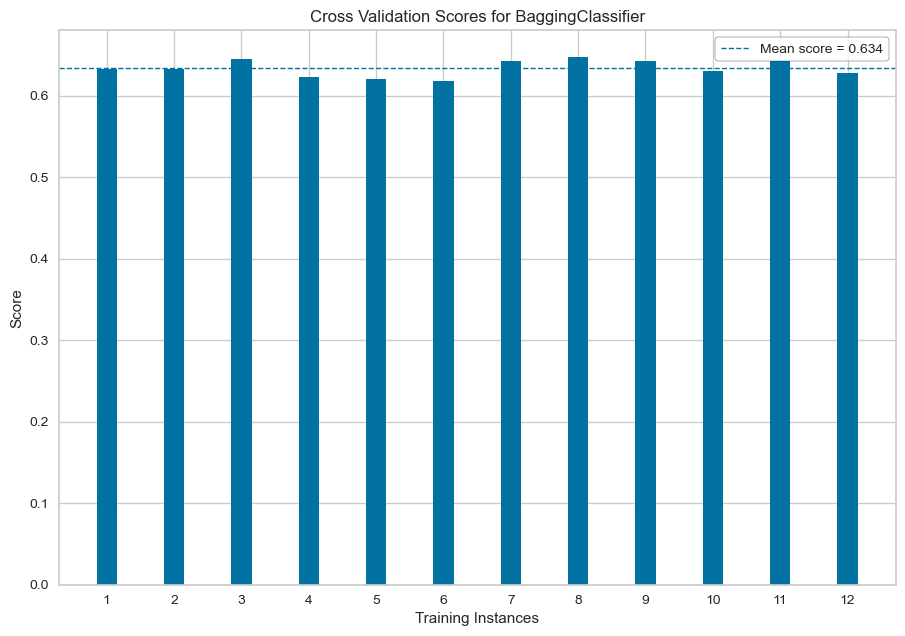

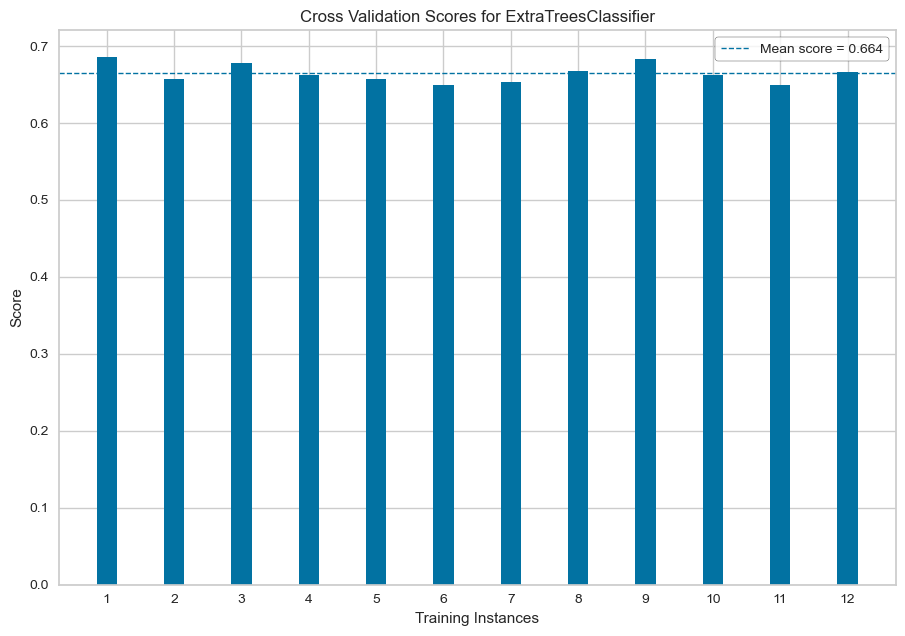

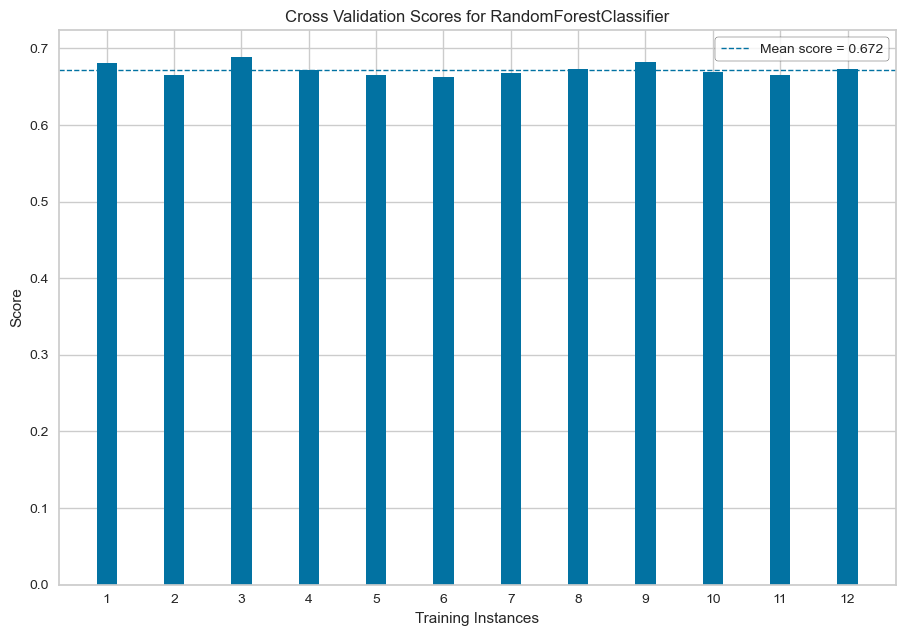

In [57]:
#Try them all
models = [MultinomialNB(),
    SVC(gamma='auto'), NuSVC(gamma='auto'), 
          LinearSVC(), 
    SGDClassifier(max_iter=100, tol=1e-3), KNeighborsClassifier(), 
    LogisticRegression(solver='lbfgs'), LogisticRegressionCV(cv=3), 
    BaggingClassifier(), ExtraTreesClassifier(n_estimators=100), 
    RandomForestClassifier(n_estimators=100)
]

for model in models:
   cross_validation(X, y, model)

## Confusion Matrices


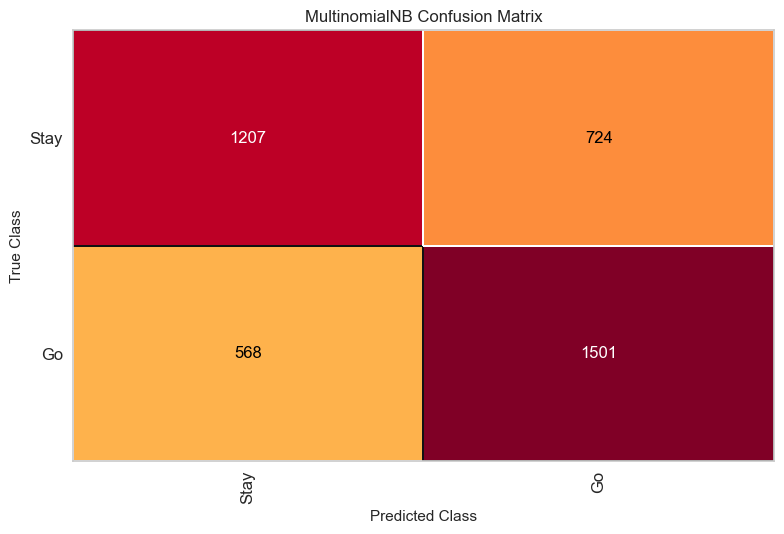

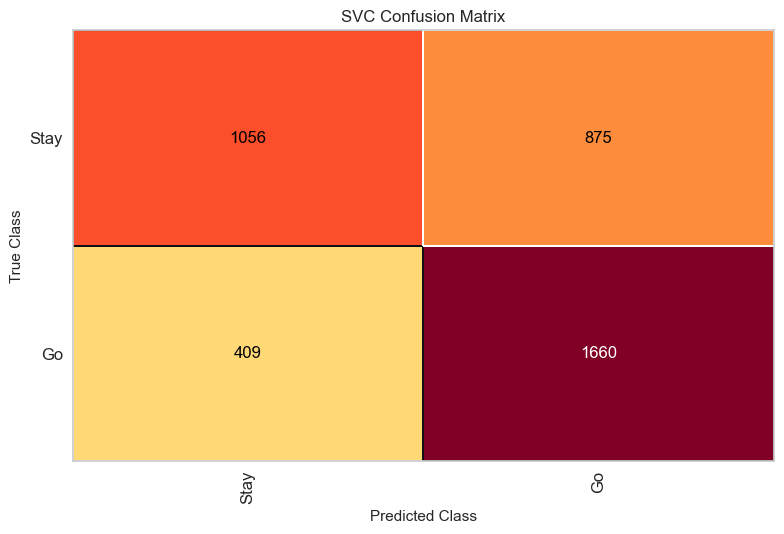

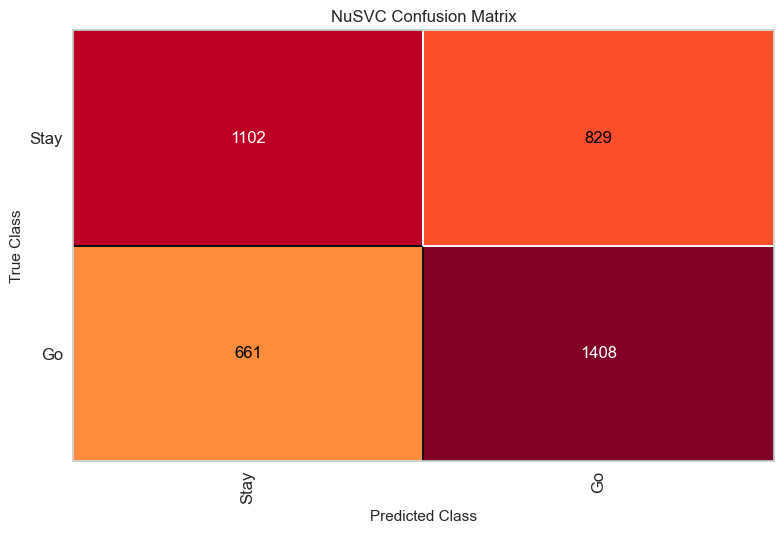

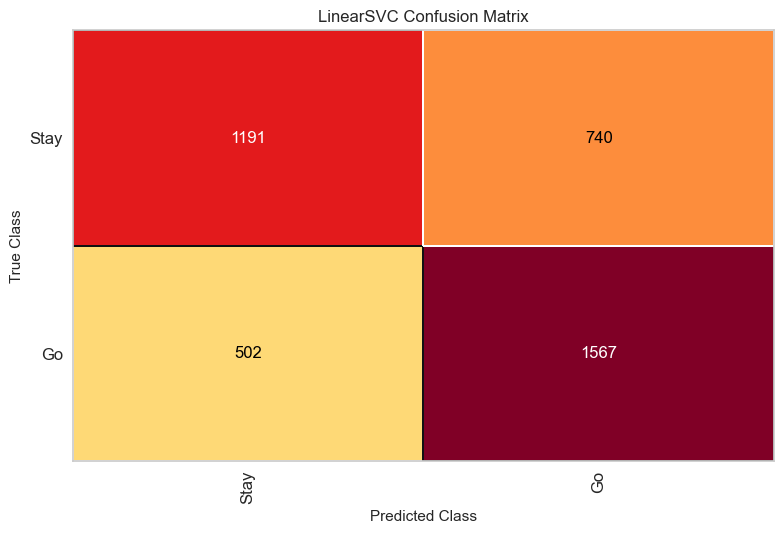

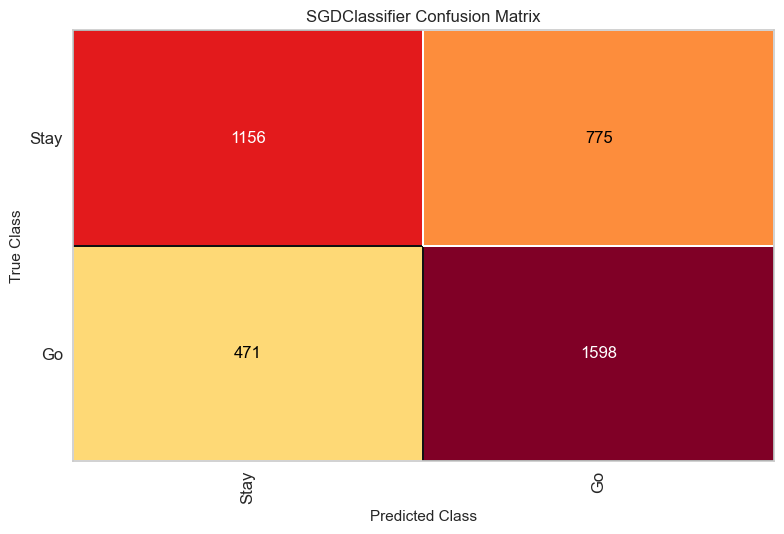

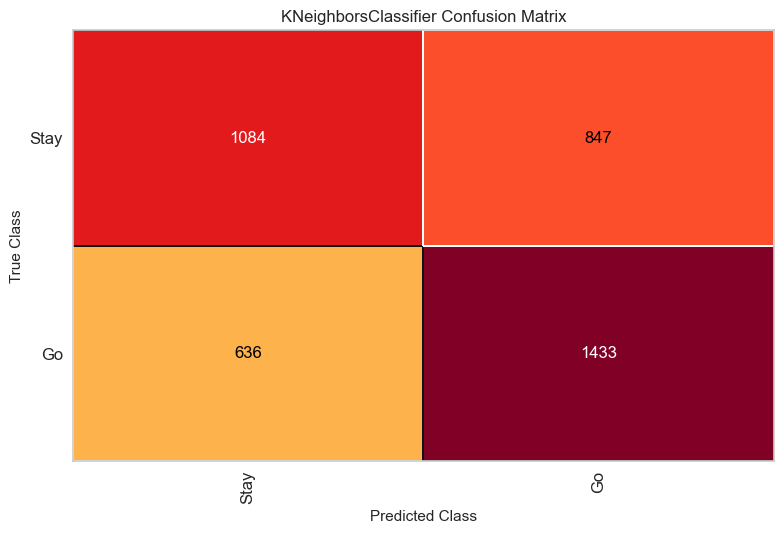

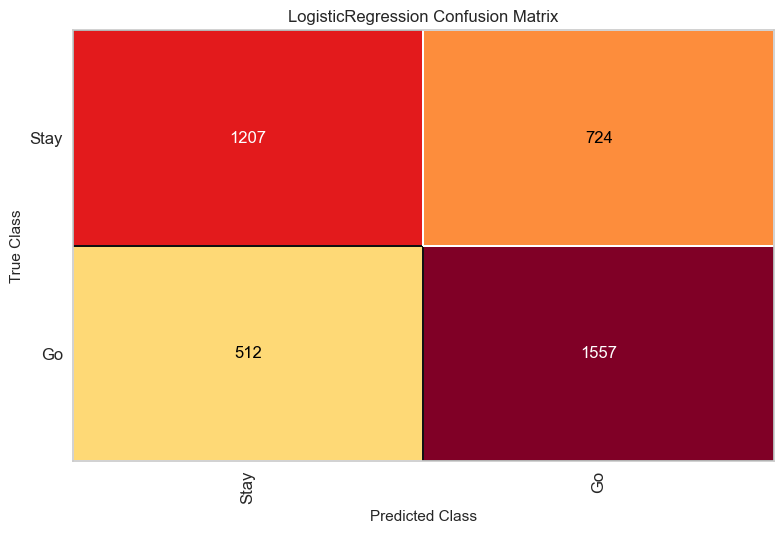

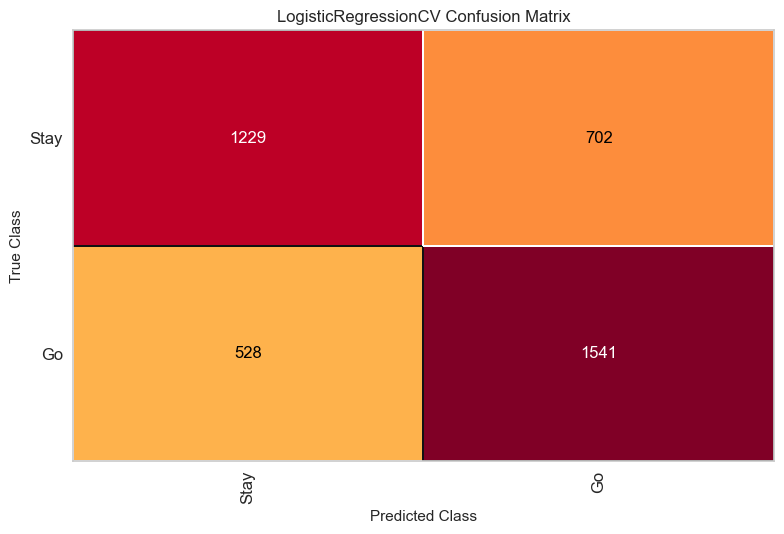

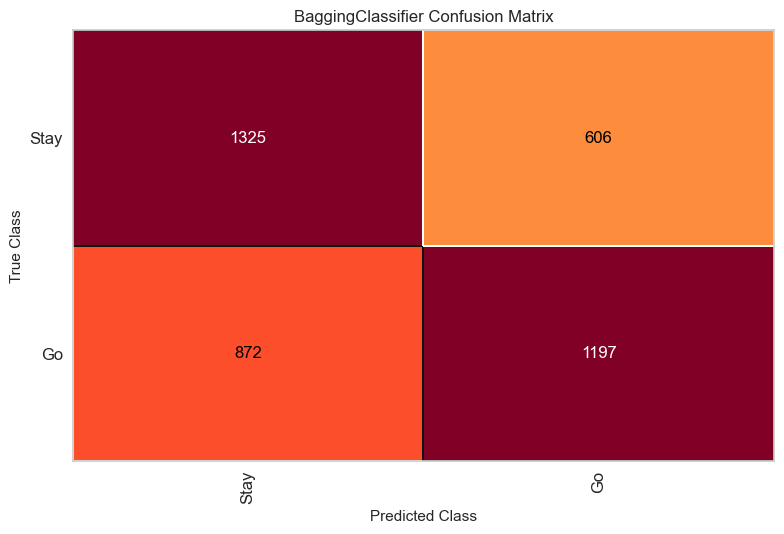

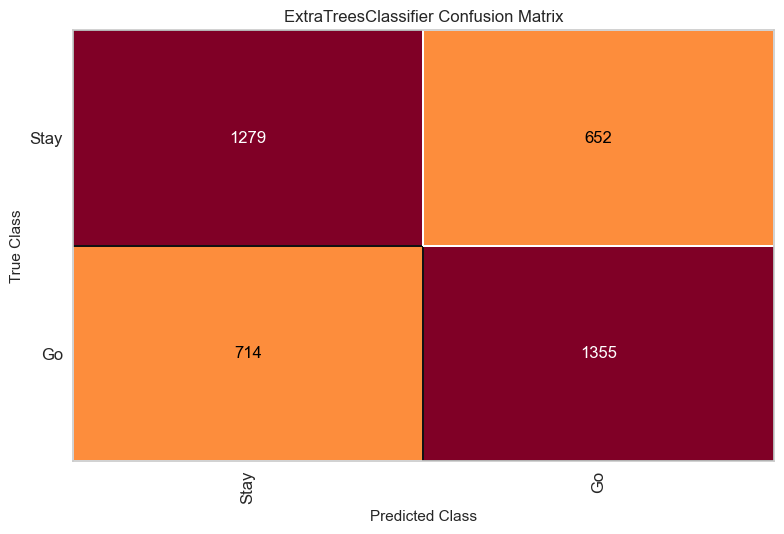

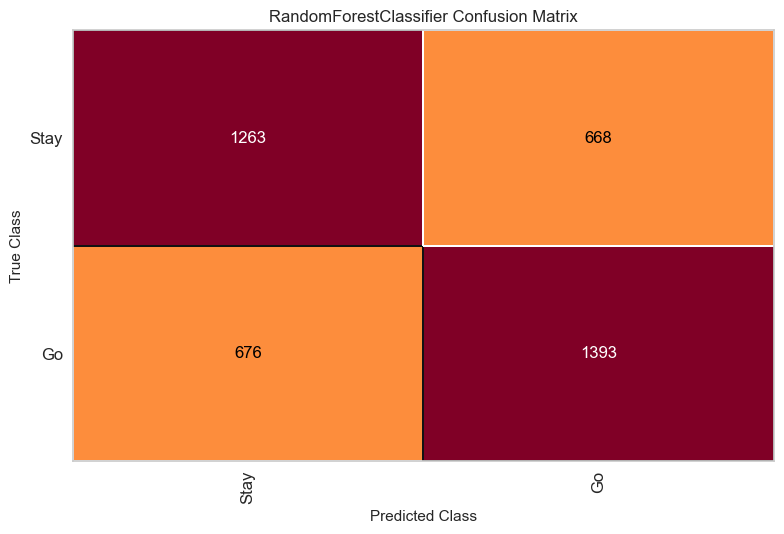

NameError: name 'plt' is not defined

In [60]:
#https://www.scikit-yb.org/en/latest/api/classifier/confusion_matrix.html
    
from yellowbrick.classifier import confusion_matrix

#IS NP.RANDOM.SEED needed here?
np.random.seed(100)

models = [MultinomialNB(),
    SVC(gamma='auto'), NuSVC(gamma='auto'), 
          LinearSVC(), 
    SGDClassifier(max_iter=100, tol=1e-3), KNeighborsClassifier(), 
    LogisticRegression(solver='lbfgs'), LogisticRegressionCV(cv=3), 
    BaggingClassifier(), ExtraTreesClassifier(n_estimators=100), 
    RandomForestClassifier(n_estimators=100)
]

for model in models:
    confusion_matrix(model(),X_train, y_train, X_test, y_test,classes=['Stay','Go']
)
plt.tight_layout()